<div style = "text-align: center"><font size = 5.5 color = "#B22222" face = "verdana"><b>Groundwater level prediction</b></font></div><br/> 
<div style = "text-align: center"><font size = 4 color = "black" face = "verdana"><b>Well: Rangpur-61 (Satgora Mistripara, Rangpur Sadar)</b></font></div>
<br/> 
<br/> 
<div style = "text-align: center"><font size = 4 color = "#00008B" face = "verdana"><b>Md.Abdullah-Al Mamun</b></font></div> 
<div style = "text-align: center"><font size = 3 color = "black" face = "verdana"><b>Master's Programme in Data Science</b></font></div> 
<div style = "text-align: center"><font size = 3 color = "black" face = "verdana"><b>Tampere University, Finland.</b></font></div><br/> 
<div style = "text-align: center"><font size = 4 color = "#00008B" face = "verdana"><b>Mst. Nazneen Aktar</b></font></div>
</font></div><div style = "text-align: center"><font size = 3 color = "black" face = "verdana"><b>B.Sc. in Disaster Management </b></font></div> 
<div style = "text-align: center"><font size = 3 color = "black" face = "verdana"><b>Begum Rokeya University, Rangpur, Bangladesh.</b></font>

# 1. Introduction

## About the dataset


Data was collected from meteorological stations in Rangpur, Saidpur, and Dinajpur through multiple sources, including the Bangladesh Meteorological Department (BMD), Bangladesh Water Development Board (BWDB), Food and Agricultural Organization (FAO), National Oceanic and Atmospheric Association (NOAA) Climate Prediction Center (CPC), Bangladesh Bureau of Statistics, and National Aeronautics and Space Administration (NASA). Additionally, monthly groundwater level (GWL) data for 12 selected wells was acquired from the Bangladesh Water Development Board (BWDB). The MODIS data was initially in Network Common Data Form (NetCDF) format and was subsequently converted to Excel format. This extensive dataset encompasses the period from 1993 to 2017.

We collected groundwater level data from three wells in the Rangpur district, and five wells in the Dinajpur district from the Bangladesh Water Development Board (BWDB). Groundwater level data collected daily(for particular dates in a month). However, groundwater level data, temperature data, and rainfall data are specific to their respective geographic areas, while the remaining data is common to all 8 wells' groundwater levels. We have predicted groundwater levels for each well sepeartly using various machine learning models, hyperparameter tuning, and hybrid modeling techniques. Finally, we have visualized our findings. 


## Data: 

**1.Groundwater Level (m)**
- GWL_Rangpur-61

**2. Temperature (°C)**
- Dinajpur_Tave

**3. Rainfall (mm)**
- Dinajpur_PRCP

**4. MODIS Normalized Difference Vegetation Index (NDVI)**
- Dinajpur_NDVI

**5. Indian Ocean Dipole (IOD)**
- IOD
    
**6. Southern Oscillation Index (SOI)**
- SOI
    
**7. Nina3.4 Value**
- Nina3.4
    
**8. MEI Value**
- MEI


#### Note: 

1. We transformed monthly data into daily values, assuming they represent monthly averages. Due to a small dataset of only 300 rows, we applied a technique to treat it as daily data. After preprocessing, we obtained 9131 rows. Additionally, we normalized the data to maintain consistent scales, crucial for effective machine learning modelling.

2. Converting to daily values and normalizing aims to provide a solid foundation for accurate machine learning predictions and analyses. This preprocessing step enhances the reliability and performance of our models.


## Identifying the Features and Targets

### Features (Independent Variables):

1. Dinajpur_Tave
2. Dinajpur_PRCP
3. Dinajpur_NDVI
4. IOD
5. SOI
6. Nina3.4
7. MEI

### Target (Dependent Variable):

1.  GWL_Rangpur-61

## Libraries

In [1]:
# Libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
from scipy import stats
from tbats import TBATS
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from skopt import BayesSearchCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from keras.models import Sequential
from skopt.space import Integer, Real
from sklearn.decomposition import PCA
from catboost import CatBoostRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.exceptions import ConvergenceWarning
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.gaussian_process import GaussianProcessRegressor
from statsmodels.nonparametric.kernel_regression import KernelReg
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, explained_variance_score

warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, module="skopt.optimizer.optimizer")
warnings.filterwarnings(action='ignore', category=UserWarning, module='xgboost')

### Loading dataset...

In [2]:
df = pd.read_excel(r'final_data_Rangpur_61.xlsx')
df

,Date,Rangpur_Tave,Rangpur_PRCP,Rangpur_NDVI,IOD,SOI,Nina3.4,MEI,GWL_Rangpur-61
0,01.01.1993,15.1,49,0.1763,-0.025962,-8.2,0.28,0.925,2.488000
1,02.01.1993,15.1,49,0.1763,-0.025962,-8.2,0.28,0.925,2.488000
2,03.01.1993,15.1,49,0.1763,-0.025962,-8.2,0.28,0.925,2.488000
3,04.01.1993,15.1,49,0.1763,-0.025962,-8.2,0.28,0.925,2.488000
4,05.01.1993,15.1,49,0.1763,-0.025962,-8.2,0.28,0.925,2.488000
...,...,...,...,...,...,...,...,...,...
9126,27.12.2017,22.6,0,0.1372,-0.204937,-1.4,-0.85,-0.404,4.506667
9127,28.12.2017,22.6,0,0.1372,-0.204937,-1.4,-0.85,-0.404,4.506667
9128,29.12.2017,22.6,0,0.1372,-0.204937,-1.4,-0.85,-0.404,4.506667
9129,30.12.2017,22.6,0,0.1372,-0.204937,-1.4,-0.85,-0.404,4.506667


In [3]:
df.columns

Index(['Date', 'Rangpur_Tave', 'Rangpur_PRCP', 'Rangpur_NDVI', 'IOD', 'SOI',
       'Nina3.4', 'MEI', 'GWL_Rangpur-61'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9131 entries, 0 to 9130
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            9131 non-null   object 
 1   Rangpur_Tave    9131 non-null   float64
 2   Rangpur_PRCP    9131 non-null   int64  
 3   Rangpur_NDVI    9131 non-null   float64
 4   IOD             9131 non-null   float64
 5   SOI             9131 non-null   float64
 6   Nina3.4         9131 non-null   float64
 7   MEI             9131 non-null   float64
 8   GWL_Rangpur-61  9131 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 642.1+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rangpur_Tave,9131.0,26.391261,16.968462,13.90000,22.300000,26.90000,28.700000,306.000000
Rangpur_PRCP,9131.0,185.486475,207.335981,0.00000,4.000000,110.00000,333.000000,913.000000
Rangpur_NDVI,9131.0,0.196554,0.073335,0.04500,0.139700,0.18040,0.251400,0.412000
IOD,9131.0,0.004448,0.344990,-0.88667,-0.203742,-0.02345,0.207985,1.472656
SOI,9131.0,-0.491052,10.714015,-28.60000,-7.800000,0.10000,7.700000,27.100000
Nina3.4,9131.0,0.007095,0.870827,-1.79000,-0.560000,-0.08000,0.480000,2.570000
MEI,9131.0,-0.005756,1.035444,-1.96400,-0.771000,-0.22500,0.612500,3.214000
GWL_Rangpur-61,9131.0,3.553533,1.252984,1.30250,2.525000,3.42400,4.517500,7.113333


In [6]:
df["GWL_Rangpur-61"].describe()

count    9131.000000
mean        3.553533
std         1.252984
min         1.302500
25%         2.525000
50%         3.424000
75%         4.517500
max         7.113333
Name: GWL_Rangpur-61, dtype: float64

In [7]:
cols_to_convert = df.columns.difference(['Date'])
df[cols_to_convert] = df[cols_to_convert].astype(float)

# 2. Data Exploration and Analysis
## Visualizing the distribution


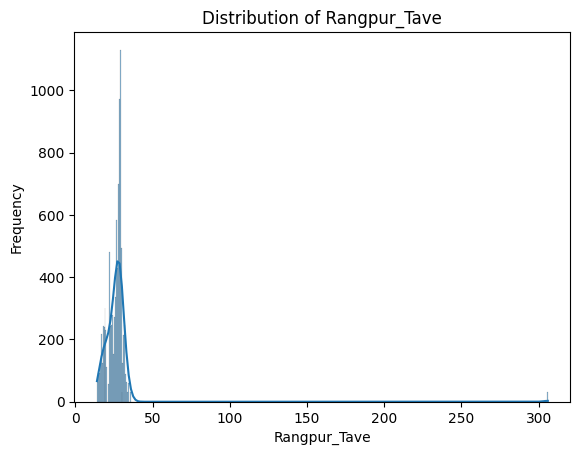

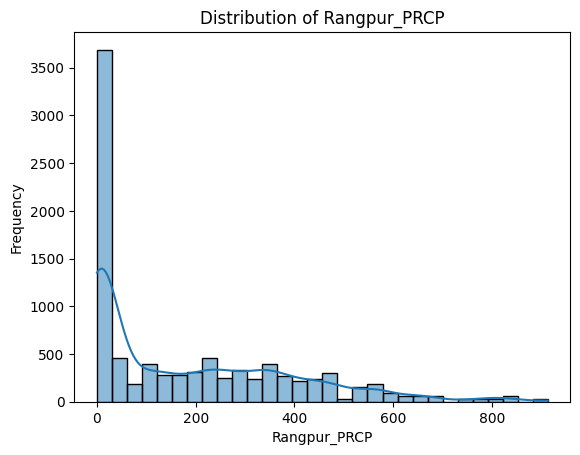

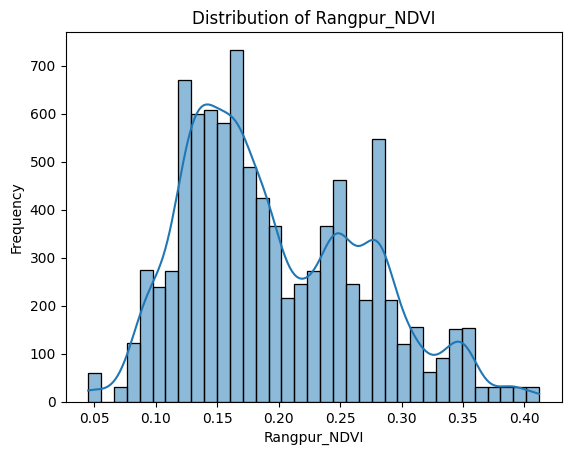

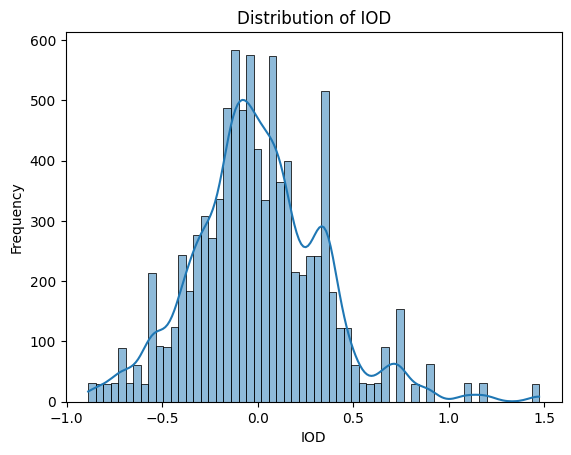

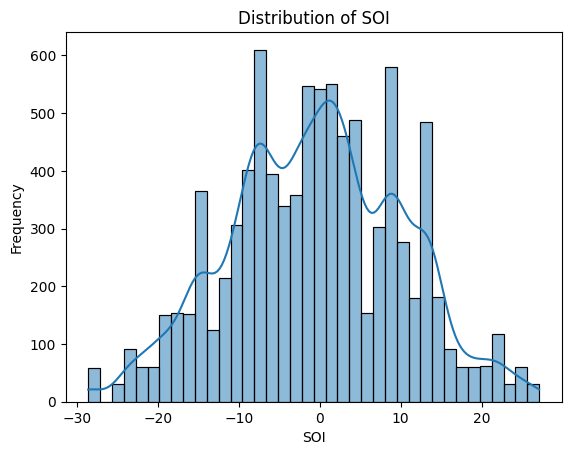

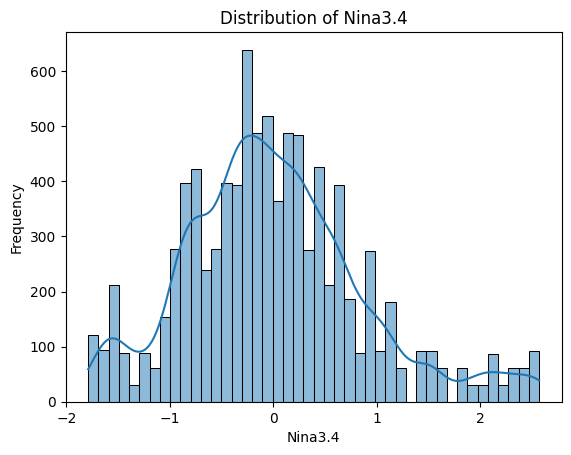

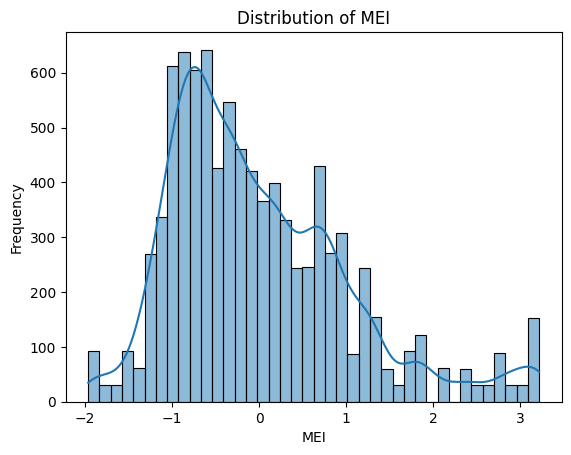

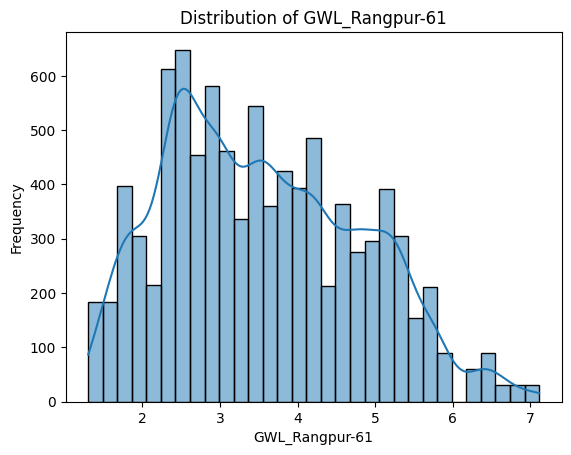

In [8]:
def plot_distribution(df, columns):
    for column in columns:
        if column != 'Date':  
            sns.histplot(df[column], kde=True)
            plt.title(f"Distribution of {column}")
            plt.xlabel(column)  
            plt.ylabel("Frequency")  
            plt.show()


numerical_cols = df.columns[1:]  

plot_distribution(df, numerical_cols)

## Data Cleaning,Checking errors, Missing values

In [9]:
from DataFrame_Checker import DataFrameChecker

#  an instance of DataFrameChecker
checker = DataFrameChecker(df)

# Calling the checking functions
checker.check_errors()

Errors in DataFrame:
No errors found in DataFrame


In [10]:
checker.check_missing_values()

No missing values found in DataFrame


## Outlier detection(Normality test)

In [11]:
def detect_outliers(data, threshold=1.5):
    outliers = None
    total_outliers = 0
    
    if pd.api.types.is_numeric_dtype(data):
        alpha = 0.05
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            stat, p = stats.shapiro(data.dropna())

        if p > alpha:
            # Normal distribution, using Z-score method (Shapiro-Wilk test)
            z_scores = np.abs(stats.zscore(data))
            column_outliers = data[z_scores > threshold]
        else:
            # Non-normal distribution, use Tukey's method
            q1 = np.percentile(data, 25)
            q3 = np.percentile(data, 75)
            iqr = q3 - q1
            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr
            column_outliers = data[(data < lower_bound) | (data > upper_bound)]
        
        if column_outliers is not None:
            outliers = column_outliers
            total_outliers += len(column_outliers)
    
    return outliers, total_outliers

In [12]:
def visualize_outliers(outliers):
    if outliers is not None:
        num_outliers = len(outliers.columns)
        num_rows = (num_outliers + 2) // 3  
        
        fig, axs = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))
        axs = axs.flatten() 
        
        for i, column in enumerate(outliers.columns):
            ax = axs[i]
            ax.boxplot(outliers[column].values, showfliers=False)
            ax.scatter(range(1, len(outliers)+1), outliers[column].values, color='red', marker='o', label='Outliers')
            ax.set_xlabel('Columns')
            ax.set_ylabel('Values')
            ax.set_title(f'Outliers - {column}')
            ax.legend()        
        
        for j in range(num_outliers, len(axs)):
            fig.delaxes(axs[j])
        
        plt.tight_layout()
        plt.show()
    else:
        print('No outliers detected.')

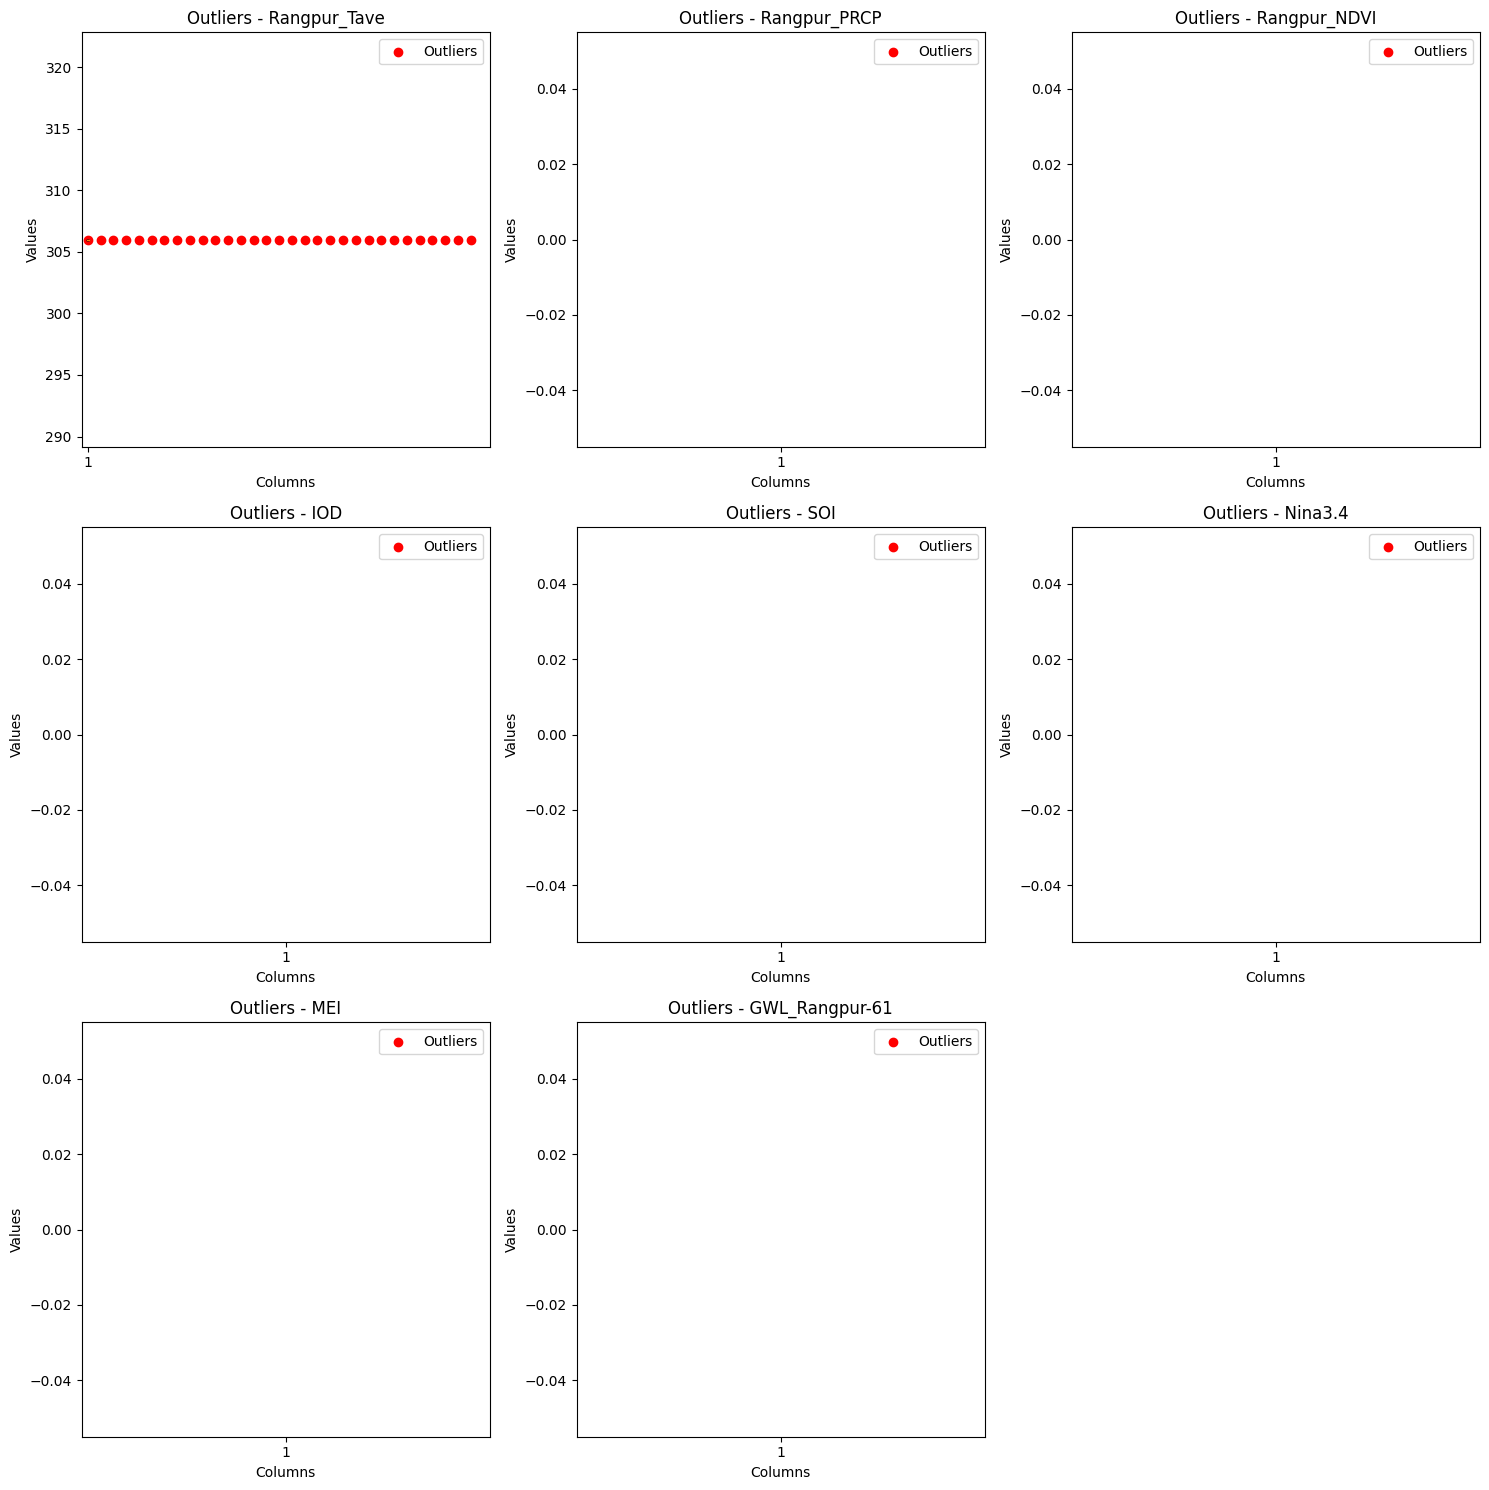

Number of total outliers: 975


In [13]:
# Detecting outliers for all numeric columns
all_outliers = pd.DataFrame()
total_outliers = 0
numeric_columns = df.select_dtypes(include=np.number).columns
for column in numeric_columns:
    column_data = df[column]
    column_outliers, column_total_outliers = detect_outliers(column_data)
    if column_outliers is not None:
        all_outliers[column] = column_outliers
        total_outliers += column_total_outliers

# Visualizing outliers with a maximum of 3 graphs in a row
visualize_outliers(all_outliers)

# the number of total outliers in all columns
print("Number of total outliers:", total_outliers)

## Multicollinearity statistics

In [14]:
numeric_df = df.iloc[:, 1:-1]  

# Calculating VIF for each variable
vif_data = numeric_df.copy()
vif_data['Intercept'] = 1 

# Calculating VIF values
vif_values = pd.Series([variance_inflation_factor(vif_data.values, i) 
                        for i in range(vif_data.shape[1])], 
                       index=vif_data.columns)

# Calculating Tolerance from VIF
tolerance_values = 1 / vif_values

# Displaying the results
print("VIF Values:")
print(vif_values)

print("\nTolerance Values:")
print(tolerance_values)

VIF Values:
Rangpur_Tave     1.098319
Rangpur_PRCP     1.091931
Rangpur_NDVI     1.100465
IOD              1.216067
SOI              2.144044
Nina3.4          2.624671
MEI              1.560971
Intercept       11.698915
dtype: float64

Tolerance Values:
Rangpur_Tave    0.910482
Rangpur_PRCP    0.915809
Rangpur_NDVI    0.908707
IOD             0.822323
SOI             0.466408
Nina3.4         0.381000
MEI             0.640627
Intercept       0.085478
dtype: float64


# 3.  Machine Learning Modelling

## Data Splitting

In [15]:
X = df.drop(columns=['GWL_Rangpur-61', 'Date'])
y = df['GWL_Rangpur-61']

# Splitting data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### ## Visualization: Data Splitting for Machine Learning

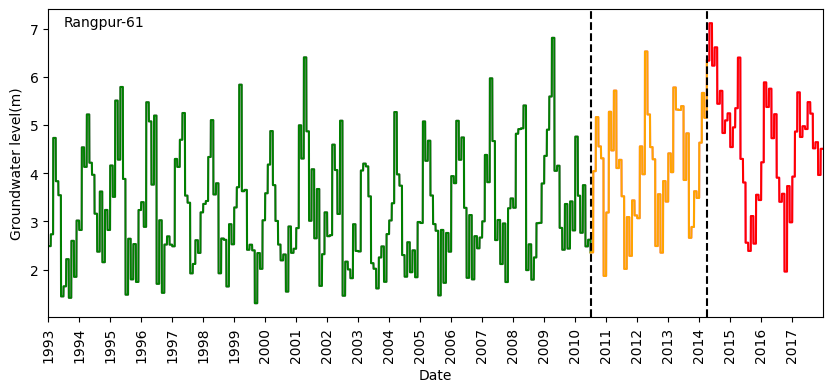

In [16]:
# Converting 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')

# Sorting DataFrame by 'Date'
df = df.sort_values(by='Date')

# Creating a time series plot
plt.figure(figsize=(10, 4))

# Plotting the entire dataset
plt.plot(df['Date'], df['GWL_Rangpur-61'], color='violet')

# Plotting training data
plt.plot(df['Date'][:len(X_train)], df['GWL_Rangpur-61'][:len(X_train)], color='green', label='Training Set')

# Plotting validation data
plt.plot(df['Date'][len(X_train):len(X_train) + len(X_val)], df['GWL_Rangpur-61'][len(X_train):len(X_train) + len(X_val)], color='orange', label='Validation Set')

# Plotting test data
plt.plot(df['Date'][len(X_train) + len(X_val):], df['GWL_Rangpur-61'][len(X_train) + len(X_val):], color='red', label='Test Set')

plt.axvline(df['Date'][len(X_train)], color='black', linestyle='--')
plt.axvline(df['Date'][len(X_train) + len(X_val)], color='black', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Groundwater level(m)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xlim(df['Date'].min(), df['Date'].max())
plt.xticks(rotation=90) 
plt.text(0.02, 0.98,"Rangpur-61", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.grid(False)
plt.show()

In [17]:
X_train

,Rangpur_Tave,Rangpur_PRCP,Rangpur_NDVI,IOD,SOI,Nina3.4,MEI
3063,27.2,235.0,0.2155,-0.157832,-9.0,-0.30,-0.322
1940,25.8,173.0,0.1464,-0.131525,-24.4,0.90,2.821
6848,27.5,6.0,0.1294,0.348779,7.3,-0.93,-0.071
3509,28.9,287.0,0.1551,-0.293105,-14.6,0.70,0.636
1612,28.2,276.0,0.1607,0.010510,-24.1,1.15,2.602
...,...,...,...,...,...,...,...
5734,28.4,227.0,0.1837,0.050483,13.5,-0.28,-0.318
5191,23.0,16.0,0.2755,0.147723,-1.4,-0.15,-0.864
5390,26.7,138.0,0.1418,0.130834,5.4,-1.40,-0.669
860,29.2,158.0,0.2843,-0.039353,-9.0,0.03,0.940


In [18]:
y_train

3063    4.870000
1940    5.102500
6848    2.286000
3509    2.165000
1612    3.536000
          ...   
5734    2.252500
5191    3.815000
5390    1.742500
860     5.790000
7270    3.836667
Name: GWL_Rangpur-61, Length: 6391, dtype: float64

In [19]:
X_temp

,Rangpur_Tave,Rangpur_PRCP,Rangpur_NDVI,IOD,SOI,Nina3.4,MEI
4043,15.9,9.0,0.1564,-0.116838,-11.6,0.26,0.526
3573,26.4,99.0,0.3435,0.626101,-7.4,1.16,1.090
4505,26.4,271.0,0.1465,0.196267,-14.5,0.30,0.588
5381,28.2,277.0,0.1440,0.380060,1.4,-1.04,-0.800
2881,22.5,0.0,0.0936,-0.029802,22.4,-0.75,-0.397
...,...,...,...,...,...,...,...
1489,16.0,19.0,0.1678,-0.058970,4.1,-0.43,-0.453
812,23.2,4.0,0.2423,0.107568,3.5,0.49,0.935
1882,19.5,12.0,0.1092,0.134668,-19.2,2.08,2.823
4974,29.7,96.0,0.1005,0.164956,-15.9,0.37,-0.474


In [20]:
y_temp

4043    3.0200
3573    1.8225
4505    3.5380
5381    2.9575
2881    2.3480
         ...  
1489    2.4840
812     5.5080
1882    3.4240
4974    3.1325
4039    3.0200
Name: GWL_Rangpur-61, Length: 2740, dtype: float64

In [21]:
X_val

,Rangpur_Tave,Rangpur_PRCP,Rangpur_NDVI,IOD,SOI,Nina3.4,MEI
7609,22.1,0.0,0.1447,-0.067228,9.2,-0.02,-0.911
4084,25.2,39.0,0.1563,-0.109683,0.2,-0.10,0.118
7920,31.9,599.0,0.1285,-0.465427,-7.6,0.37,-0.523
8327,31.6,3.0,0.3282,0.403764,-20.2,2.21,-0.228
2716,28.7,438.0,0.1942,-0.067885,-5.5,-0.75,-0.711
...,...,...,...,...,...,...,...
5762,26.2,175.0,0.2448,0.102282,13.4,-0.30,-0.012
3254,23.3,7.0,0.1265,-0.082291,7.2,-0.28,-0.290
4541,28.8,428.0,0.1633,0.016435,2.6,0.22,0.737
350,19.0,0.0,0.1228,-0.157270,1.6,0.19,0.784


In [22]:
X_test

,Rangpur_Tave,Rangpur_PRCP,Rangpur_NDVI,IOD,SOI,Nina3.4,MEI
4710,22.2,0.0,0.1304,-0.361621,-2.0,-0.44,-0.998
131,26.4,190.0,0.1219,0.312997,-8.2,0.93,1.860
2802,27.5,172.0,0.1178,0.012307,9.9,-0.39,-0.113
4472,24.0,61.0,0.1041,-0.561639,0.2,0.28,0.631
1108,16.4,13.0,0.2777,0.337663,8.4,-0.65,-0.437
...,...,...,...,...,...,...,...
2948,15.7,0.0,0.1224,0.152971,8.4,-0.88,-0.706
6394,29.4,346.0,0.2514,-0.197084,20.5,-0.89,-1.964
1746,25.4,16.0,0.1976,1.088737,-17.8,2.29,3.214
5820,19.5,0.0,0.3542,-0.102193,13.3,-0.90,-0.540


In [23]:
y_val

7609    3.626
4084    5.270
7920    5.710
8327    2.540
2716    2.520
        ...  
5762    2.964
3254    2.320
4541    2.945
350     3.018
2164    2.526
Name: GWL_Rangpur-61, Length: 1370, dtype: float64

In [24]:
y_test

4710    2.760000
131     3.544000
2802    1.543333
4472    4.258000
1108    3.400000
          ...   
2948    2.862000
6394    2.356667
1746    2.610000
5820    3.787500
6160    3.415000
Name: GWL_Rangpur-61, Length: 1370, dtype: float64

In [25]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Rangpur_Tave,6391.0,26.507604,17.423117,13.90000,22.400000,27.100000,28.700000,306.000000
Rangpur_PRCP,6391.0,189.058833,208.826410,0.00000,6.000000,115.000000,336.000000,913.000000
Rangpur_NDVI,6391.0,0.197189,0.073725,0.04500,0.139900,0.180400,0.251400,0.412000
IOD,6391.0,0.001845,0.342237,-0.88667,-0.204923,-0.024343,0.203625,1.472656
SOI,6391.0,-0.442857,10.669366,-28.60000,-7.800000,0.100000,7.700000,27.100000
Nina3.4,6391.0,0.004907,0.865949,-1.79000,-0.565000,-0.070000,0.480000,2.570000
MEI,6391.0,-0.010235,1.037451,-1.96400,-0.774000,-0.228000,0.631000,3.214000


In [26]:
# Getting the indices of the data points in each set
train_indices = X_train.index
val_indices = X_val.index
test_indices = X_test.index

# Checking if there's any overlap between the sets
assert len(set(train_indices).intersection(val_indices)) == 0, "Overlap between training and validation sets!"
assert len(set(train_indices).intersection(test_indices)) == 0, "Overlap between training and test sets!"
assert len(set(val_indices).intersection(test_indices)) == 0, "Overlap between validation and test sets!"

# If the code reaches this point, it means there is no overlap
print("No overlap detected. Data splitting is correct.")

No overlap detected. Data splitting is correct.


### Descriptive Statistics(Training,Validation and Testing stage)

In [27]:
# Training Set: Descriptive Statistics
train_stats = X_train.describe()
print("Descriptive Statistics: Training Set ")
train_stats.T

Descriptive Statistics: Training Set 


,count,mean,std,min,25%,50%,75%,max
Rangpur_Tave,6391.0,26.507604,17.423117,13.90000,22.400000,27.100000,28.700000,306.000000
Rangpur_PRCP,6391.0,189.058833,208.826410,0.00000,6.000000,115.000000,336.000000,913.000000
Rangpur_NDVI,6391.0,0.197189,0.073725,0.04500,0.139900,0.180400,0.251400,0.412000
IOD,6391.0,0.001845,0.342237,-0.88667,-0.204923,-0.024343,0.203625,1.472656
SOI,6391.0,-0.442857,10.669366,-28.60000,-7.800000,0.100000,7.700000,27.100000
Nina3.4,6391.0,0.004907,0.865949,-1.79000,-0.565000,-0.070000,0.480000,2.570000
MEI,6391.0,-0.010235,1.037451,-1.96400,-0.774000,-0.228000,0.631000,3.214000


In [28]:
# Validation Set: Descriptive Statistics
val_stats = X_val.describe()
print("\nDescriptive Statistics: Validation Set ")
val_stats.T


Descriptive Statistics: Validation Set 


,count,mean,std,min,25%,50%,75%,max
Rangpur_Tave,1370.0,25.746642,11.702580,13.90000,22.200000,26.70000,28.700000,306.000000
Rangpur_PRCP,1370.0,178.626277,202.829295,0.00000,3.000000,106.00000,332.000000,913.000000
Rangpur_NDVI,1370.0,0.194820,0.071452,0.04500,0.139750,0.17630,0.249400,0.412000
IOD,1370.0,0.003595,0.355028,-0.88667,-0.204923,-0.02345,0.213949,1.472656
SOI,1370.0,-0.599489,10.584601,-28.60000,-8.000000,0.10000,7.300000,27.100000
Nina3.4,1370.0,0.015898,0.864088,-1.79000,-0.545000,-0.07000,0.470000,2.570000
MEI,1370.0,-0.015441,1.004000,-1.96400,-0.730500,-0.25600,0.582000,3.214000


In [29]:
# Test Set: Descriptive Statistics
test_stats = X_test.describe()
print("\nDescriptive Statistics: Testing Set ")
test_stats.T


Descriptive Statistics: Testing Set 


,count,mean,std,min,25%,50%,75%,max
Rangpur_Tave,1370.0,26.493139,19.127301,13.90000,22.200000,26.800000,28.600000,306.000000
Rangpur_PRCP,1370.0,175.681752,204.454072,0.00000,3.000000,96.000000,313.000000,913.000000
Rangpur_NDVI,1370.0,0.195329,0.073376,0.04500,0.138200,0.177450,0.251400,0.412000
IOD,1370.0,0.017447,0.347552,-0.88667,-0.178294,0.010084,0.227375,1.472656
SOI,1370.0,-0.607445,11.051441,-28.60000,-7.900000,0.000000,7.700000,27.100000
Nina3.4,1370.0,0.008496,0.900322,-1.79000,-0.570000,-0.090000,0.480000,2.570000
MEI,1370.0,0.024823,1.057025,-1.96400,-0.729000,-0.220000,0.644000,3.214000


## Normalization of the data

In [30]:
# Normalization of the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns = X_train.columns
)

X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns = X_test.columns
)

X_val = pd.DataFrame(
    scaler.transform(X_val),
    columns = X_val.columns
)

In [31]:
X_train.head(2)

,Rangpur_Tave,Rangpur_PRCP,Rangpur_NDVI,IOD,SOI,Nina3.4,MEI
0,0.039743,0.220014,0.248387,-0.466604,-0.802092,-0.352135,-0.300534
1,-0.040616,-0.076906,-0.688951,-0.389732,-2.245590,1.033736,2.729244


In [32]:
X_test.head(2)

,Rangpur_Tave,Rangpur_PRCP,Rangpur_NDVI,IOD,SOI,Nina3.4,MEI
0,-0.247254,-0.905411,-0.905990,-1.062112,-0.145957,-0.513820,-0.952183
1,-0.006176,0.004507,-1.021292,0.909241,-0.727105,1.068383,1.802862


In [33]:
X_val.head(2)

,Rangpur_Tave,Rangpur_PRCP,Rangpur_NDVI,IOD,SOI,Nina3.4,MEI
0,-0.252994,-0.905411,-0.712011,-0.201844,0.903860,-0.028765,-0.868317
1,-0.075056,-0.718638,-0.554658,-0.325903,0.060257,-0.121156,0.123615


## Machine Learning Modelling

In [34]:
# Base models

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Ridge': Ridge(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'ElasticNet Regression': ElasticNet(),
    'Gaussian Process Regressor': GaussianProcessRegressor(random_state=42),
    'Weighted K-Nearest Neighbors': KNeighborsRegressor(weights='distance'),
    'LightGBM': LGBMRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(random_state=42, verbose=0),
    'XGBoost': XGBRegressor(),
    'Bayesian Ridge Regression': BayesianRidge(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'Locally Weighted Linear Regression': KNeighborsRegressor(n_neighbors=5, weights='distance')
}

results = {}

for name, model in models.items():
    # Training the model
    model.fit(X_train, y_train)
    
    # Predicting on the training set
    y_pred_train = model.predict(X_train)
    
    # Predicting on the validation set
    y_pred_val = model.predict(X_val)
    
    # Predicting on the test set
    y_pred_test = model.predict(X_test)

    # Calculating metrics for the training set
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    train_mae = mean_absolute_error(y_train, y_pred_train)
    train_r2 = r2_score(y_train, y_pred_train)
    train_rae = mean_absolute_percentage_error(y_train, y_pred_train)
    train_cc = np.corrcoef(y_train, y_pred_train)[0, 1]

    # Calculating metrics for the validation set
    val_rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
    val_mae = mean_absolute_error(y_val, y_pred_val)
    val_r2 = r2_score(y_val, y_pred_val)
    val_rae = mean_absolute_percentage_error(y_val, y_pred_val)
    val_cc = np.corrcoef(y_val, y_pred_val)[0, 1]
    
    # Calculating metrics for the test set
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_r2 = r2_score(y_test, y_pred_test)
    test_rae = mean_absolute_percentage_error(y_test, y_pred_test)
    test_cc = np.corrcoef(y_test, y_pred_test)[0, 1]

    results[name] = {
        'Train RMSE': train_rmse,
        'Train MAE': train_mae,
        'Train R-squared': train_r2,
        'Train RAE': train_rae,
        'Train CC': train_cc,        
        'Validation RMSE': val_rmse,
        'Validation MAE': val_mae,
        'Validation R-squared': val_r2,
        'Validation RAE': val_rae,
        'Validation CC': val_cc,
        'Test RMSE': test_rmse,
        'Test MAE': test_mae,
        'Test R-squared': test_r2,
        'Test RAE': test_rae,
        'Test CC': test_cc
    }

# Printing the results
for model, metrics in results.items():
    print(f"Metrics for {model}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:}")
    print("\n")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000832 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1433
[LightGBM] [Info] Number of data points in the train set: 6391, number of used features: 7
[LightGBM] [Info] Start training from score 3.547587
Metrics for Linear Regression:
Train RMSE: 1.1854312280035053
Train MAE: 0.9950992846114922
Train R-squared: 0.10576003013085233
Train RAE: 0.3244006611841251
Train CC: 0.3252076723124043
Validation RMSE: 1.2004604592125099
Validation MAE: 1.0008405505814228
Validation R-squared: 0.09254450767957534
Validation RAE: 0.32278499773537006
Validation CC: 0.304986481172044
Test RMSE: 1.19194047083835
Test MAE: 1.0080196593754054
Test R-squared: 0.07888033655046378
Test RAE: 0.3273652568679203
Test CC: 0.28515563452829346


Metrics for Decision Tree:
Train RMSE: 1.2231901944110777e-15
Train MAE: 

# 4. Hyperparameter tuning

## 1. Random Forest Regressor ( Hyperparameter Tuning)

In [35]:
# Initializing Random Forest model
random_forest = RandomForestRegressor()

# the hyperparameters and their possible values for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [None, 5, 10],    
    'min_samples_split': [2, 5, 10] 
}

# Initializing Grid Search for Random Forest
grid_search_rf = GridSearchCV(random_forest, param_grid_rf, scoring='neg_mean_squared_error', cv=5)

# Performing Grid Search for Random Forest
grid_search_rf.fit(X_train, y_train)

# Getting the best hyperparameters and model for Random Forest
best_rf = grid_search_rf.best_estimator_
best_params_rf = grid_search_rf.best_params_

# Predicting on training set using Random Forest
rf_pred_train = best_rf.predict(X_train)

# Calculating metrics for Random Forest on training set
rf_rmse_train = np.sqrt(mean_squared_error(y_train, rf_pred_train))
rf_mae_train = mean_absolute_error(y_train, rf_pred_train)
rf_r2_train = r2_score(y_train, rf_pred_train)
rf_rae_train = mean_absolute_percentage_error(y_train, rf_pred_train)
rf_cc_train = np.corrcoef(y_train, rf_pred_train)[0, 1]

# Predicting on validation set using Random Forest
rf_pred_val = best_rf.predict(X_val)

# Calculating metrics for Random Forest on validation set
rf_rmse_val = np.sqrt(mean_squared_error(y_val, rf_pred_val))
rf_mae_val = mean_absolute_error(y_val, rf_pred_val)
rf_r2_val = r2_score(y_val, rf_pred_val)
rf_rae_val = mean_absolute_percentage_error(y_val, rf_pred_val)
rf_cc_val = np.corrcoef(y_val, rf_pred_val)[0, 1]

# Predicting on test set using Random Forest
rf_pred_test = best_rf.predict(X_test)

# Calculating metrics for Random Forest on test set
rf_rmse_test = np.sqrt(mean_squared_error(y_test, rf_pred_test))
rf_mae_test = mean_absolute_error(y_test, rf_pred_test)
rf_r2_test = r2_score(y_test, rf_pred_test)
rf_rae_test = mean_absolute_percentage_error(y_test, rf_pred_test)
rf_cc_test = np.corrcoef(y_test, rf_pred_test)[0, 1]

print("Best Hyperparameters for Random Forest:", best_params_rf)
print()

# Printing metrics for training set
print("Random Forest RMSE (Train):", rf_rmse_train)
print("Random Forest MAE (Train):", rf_mae_train)
print("Random Forest R-squared (Train):", rf_r2_train)
print("Random Forest RAE (Train):", rf_rae_train)
print("Random Forest CC (Train):", rf_cc_train)

print()


print("Random Forest RMSE (Validation):", rf_rmse_val)
print("Random Forest MAE (Validation):", rf_mae_val)
print("Random Forest R-squared (Validation):", rf_r2_val)
print("Random Forest RAE (Validation):", rf_rae_val)
print("Random Forest CC (Validation):", rf_cc_val)

print()

print("Random Forest RMSE (Test):", rf_rmse_test)
print("Random Forest MAE (Test):", rf_mae_test)
print("Random Forest R-squared (Test):", rf_r2_test)
print("Random Forest RAE (Test):", rf_rae_test)
print("Random Forest CC (Test):", rf_cc_test)

Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}

Random Forest RMSE (Train): 2.343194104654358e-15
Random Forest MAE (Train): 1.911265179397731e-15
Random Forest R-squared (Train): 1.0
Random Forest RAE (Train): 5.508694509328929e-16
Random Forest CC (Train): 0.9999999999999998

Random Forest RMSE (Validation): 2.3958010747936543e-15
Random Forest MAE (Validation): 1.9366503534665687e-15
Random Forest R-squared (Validation): 1.0
Random Forest RAE (Validation): 5.432127788156834e-16
Random Forest CC (Validation): 1.0

Random Forest RMSE (Test): 2.29532690411385e-15
Random Forest MAE (Test): 1.853505183885152e-15
Random Forest R-squared (Test): 1.0
Random Forest RAE (Test): 5.332392343375051e-16
Random Forest CC (Test): 1.0


## 2. AdaBoost ( Hyperparameter Tuning)

In [36]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

# Define the AdaBoostRegressor model
adaboost = AdaBoostRegressor(random_state=42)

# Define the search space for hyperparameters
param_space = {
    'n_estimators': Integer(50, 200),      # Number of estimators
    'learning_rate': Real(0.01, 1.0, prior='log-uniform'),  # Learning rate
    'loss': ['linear', 'square', 'exponential']  # Loss function options
}

# Initialize Bayesian Optimization for AdaBoostRegressor
adaboost_search = BayesSearchCV(
    adaboost, 
    param_space, 
    n_iter=50, 
    scoring='neg_mean_squared_error',
    cv=5, 
    n_jobs=-1,
    random_state=42
)

# Perform Bayesian Optimization for AdaBoostRegressor
adaboost_search.fit(X_train, y_train)

# Get the best hyperparameters and model for AdaBoostRegressor
best_adaboost = adaboost_search.best_estimator_
best_params_adaboost = adaboost_search.best_params_

# Predicting on training set using AdaBoostRegressor
adaboost_pred_train = best_adaboost.predict(X_train)

adaboost_rae_train = np.mean(np.abs(y_train - adaboost_pred_train) / np.abs(y_train))
adaboost_cc_train = np.corrcoef(y_train, adaboost_pred_train)[0, 1]
adaboost_rmse_train = np.sqrt(mean_squared_error(y_train, adaboost_pred_train))
adaboost_mae_train = mean_absolute_error(y_train, adaboost_pred_train)
adaboost_r2_train = r2_score(y_train, adaboost_pred_train)

print("Best Hyperparameters for AdaBoostRegressor:", best_params_adaboost)
print()

print("AdaBoostRegressor RMSE (Train):", adaboost_rmse_train)
print("AdaBoostRegressor MAE (Train):", adaboost_mae_train)
print("AdaBoostRegressor R-squared (Train):", adaboost_r2_train)
print("AdaBoostRegressor RAE (Train):", adaboost_rae_train)
print("AdaBoostRegressor CC (Train):", adaboost_cc_train)

# Predicting on validation set using AdaBoostRegressor
adaboost_pred_val = best_adaboost.predict(X_val)

adaboost_rae_val = np.mean(np.abs(y_val - adaboost_pred_val) / np.abs(y_val))
adaboost_cc_val = np.corrcoef(y_val, adaboost_pred_val)[0, 1]
adaboost_rmse_val = np.sqrt(mean_squared_error(y_val, adaboost_pred_val))
adaboost_mae_val = mean_absolute_error(y_val, adaboost_pred_val)
adaboost_r2_val = r2_score(y_val, adaboost_pred_val)

print("\nAdaBoostRegressor RMSE (Validation):", adaboost_rmse_val)
print("AdaBoostRegressor MAE (Validation):", adaboost_mae_val)
print("AdaBoostRegressor R-squared (Validation):", adaboost_r2_val)
print("AdaBoostRegressor RAE (Validation):", adaboost_rae_val)
print("AdaBoostRegressor CC (Validation):", adaboost_cc_val)

# Predicting on the test set using AdaBoostRegressor
adaboost_pred_test = best_adaboost.predict(X_test)

adaboost_rae_test = np.mean(np.abs(y_test - adaboost_pred_test) / np.abs(y_test))
adaboost_cc_test = np.corrcoef(y_test, adaboost_pred_test)[0, 1]
adaboost_rmse_test = np.sqrt(mean_squared_error(y_test, adaboost_pred_test))
adaboost_mae_test = mean_absolute_error(y_test, adaboost_pred_test)
adaboost_r2_test = r2_score(y_test, adaboost_pred_test)

print("\nAdaBoostRegressor RMSE (Test):", adaboost_rmse_test)
print("AdaBoostRegressor MAE (Test):", adaboost_mae_test)
print("AdaBoostRegressor R-squared (Test):", adaboost_r2_test)
print("AdaBoostRegressor RAE (Test):", adaboost_rae_test)
print("AdaBoostRegressor CC (Test):", adaboost_cc_test)

Best Hyperparameters for AdaBoostRegressor: OrderedDict([('learning_rate', 1.0), ('loss', 'square'), ('n_estimators', 200)])

AdaBoostRegressor RMSE (Train): 0.8506378986063398
AdaBoostRegressor MAE (Train): 0.7412793629721813
AdaBoostRegressor R-squared (Train): 0.5395411694587031
AdaBoostRegressor RAE (Train): 0.2536904333437046
AdaBoostRegressor CC (Train): 0.7773125130209304

AdaBoostRegressor RMSE (Validation): 0.8490595795481751
AdaBoostRegressor MAE (Validation): 0.7439265104246181
AdaBoostRegressor R-squared (Validation): 0.5460521678504986
AdaBoostRegressor RAE (Validation): 0.2507781936213254
AdaBoostRegressor CC (Validation): 0.7835837987210131

AdaBoostRegressor RMSE (Test): 0.8633186485044217
AdaBoostRegressor MAE (Test): 0.7598480681869286
AdaBoostRegressor R-squared (Test): 0.5167752546092991
AdaBoostRegressor RAE (Test): 0.25662287131300254
AdaBoostRegressor CC (Test): 0.7657880008959506


## 3. Gaussian Process Regression ( Hyperparameter Tuning)

In [37]:
# the hyperparameters and their possible values for Gaussian Process Regression
param_grid_gpr = {
    'kernel': [None, 1.0 * RBF(length_scale=1.0), Matern(length_scale=1.0, nu=1.5), WhiteKernel(noise_level=1.0)],   
  
}

# Initializing Grid Search for Gaussian Process Regression
grid_search_gpr = GridSearchCV(GaussianProcessRegressor(), param_grid_gpr, scoring='neg_mean_squared_error', cv=5)
grid_search_gpr.fit(X_train, y_train)

# Getting the best hyperparameters and model for Gaussian Process Regression
best_gpr = grid_search_gpr.best_estimator_
best_params_gpr = grid_search_gpr.best_params_

# Predicting on training set using Gaussian Process Regression
gpr_pred_train = best_gpr.predict(X_train)

# Calculating metrics for Gaussian Process Regression on training set
gpr_rmse_train = np.sqrt(mean_squared_error(y_train, gpr_pred_train))
gpr_mae_train = mean_absolute_error(y_train, gpr_pred_train)
gpr_r2_train = r2_score(y_train, gpr_pred_train)
gpr_rae_train = mean_absolute_percentage_error(y_train, gpr_pred_train)
gpr_cc_train = np.corrcoef(y_train, gpr_pred_train)[0, 1]

# Predicting on validation set using Gaussian Process Regression
gpr_pred_val = best_gpr.predict(X_val)

# Calculating metrics for Gaussian Process Regression on validation set
gpr_rmse_val = np.sqrt(mean_squared_error(y_val, gpr_pred_val))
gpr_mae_val = mean_absolute_error(y_val, gpr_pred_val)
gpr_r2_val = r2_score(y_val, gpr_pred_val)
gpr_rae_val = mean_absolute_percentage_error(y_val, gpr_pred_val)
gpr_cc_val = np.corrcoef(y_val, gpr_pred_val)[0, 1]

# Predicting on test set using Gaussian Process Regression
gpr_pred_test = best_gpr.predict(X_test)

# Calculating metrics for Gaussian Process Regression on test set
gpr_rmse_test = np.sqrt(mean_squared_error(y_test, gpr_pred_test))
gpr_mae_test = mean_absolute_error(y_test, gpr_pred_test)
gpr_r2_test = r2_score(y_test, gpr_pred_test)
gpr_rae_test = mean_absolute_percentage_error(y_test, gpr_pred_test)
gpr_cc_test = np.corrcoef(y_test, gpr_pred_test)[0, 1]

print("Best Hyperparameters for Gaussian Process Regression:", best_params_gpr)
print()

# Printing metrics for training set
print("Gaussian Process RMSE (Train):", gpr_rmse_train)
print("Gaussian Process MAE (Train):", gpr_mae_train)
print("Gaussian Process R-squared (Train):", gpr_r2_train)
print("Gaussian Process RAE (Train):", gpr_rae_train)
print("Gaussian Process CC (Train):", gpr_cc_train)

print()

print("Gaussian Process RMSE (Validation):", gpr_rmse_val)
print("Gaussian Process MAE (Validation):", gpr_mae_val)
print("Gaussian Process R-squared (Validation):", gpr_r2_val)
print("Gaussian Process RAE (Validation):", gpr_rae_val)
print("Gaussian Process CC (Validation):", gpr_cc_val) 

print()

# Printing metrics for test set
print("Gaussian Process RMSE (Test):", gpr_rmse_test)
print("Gaussian Process MAE (Test):", gpr_mae_test)
print("Gaussian Process R-squared (Test):", gpr_r2_test)
print("Gaussian Process RAE (Test):", gpr_rae_test)
print("Gaussian Process CC (Test):", gpr_cc_test)

Best Hyperparameters for Gaussian Process Regression: {'kernel': 1**2 * RBF(length_scale=1)}

Gaussian Process RMSE (Train): 1.261139146790422e-12
Gaussian Process MAE (Train): 1.1732232390343225e-12
Gaussian Process R-squared (Train): 1.0
Gaussian Process RAE (Train): 3.2962279668583556e-13
Gaussian Process CC (Train): 0.9999999999999998

Gaussian Process RMSE (Validation): 1.3588324537606446e-12
Gaussian Process MAE (Validation): 1.2620655534432988e-12
Gaussian Process R-squared (Validation): 1.0
Gaussian Process RAE (Validation): 3.5042821142223125e-13
Gaussian Process CC (Validation): 1.0

Gaussian Process RMSE (Test): 1.3575332449002027e-12
Gaussian Process MAE (Test): 1.2562580335282085e-12
Gaussian Process R-squared (Test): 1.0
Gaussian Process RAE (Test): 3.5186706831387217e-13
Gaussian Process CC (Test): 1.0


## 4. Weighted K-Nearest Neighbors ( Hyperparameter Tuning)

In [38]:
# the hyperparameters and their possible values for Weighted K-Nearest Neighbors
param_grid_wknn = {
     'n_neighbors': [3, 5, 7, 9, 11],   
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  
    'leaf_size': [10, 30, 50], 
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan']  
}

# Initializing Grid Search for Weighted K-Nearest Neighbors
grid_search_wknn = GridSearchCV(KNeighborsRegressor(weights='distance'), param_grid_wknn, scoring='neg_mean_squared_error', cv=5)
grid_search_wknn.fit(X_train, y_train)

# Getting the best hyperparameters and model for Weighted K-Nearest Neighbors
best_wknn = grid_search_wknn.best_estimator_
best_params_wknn = grid_search_wknn.best_params_

# Predicting on training set using Weighted K-Nearest Neighbors
wknn_pred_train = best_wknn.predict(X_train)

# Calculating metrics for Weighted K-Nearest Neighbors on training set
wknn_rmse_train = np.sqrt(mean_squared_error(y_train, wknn_pred_train))
wknn_mae_train = mean_absolute_error(y_train, wknn_pred_train)
wknn_r2_train = r2_score(y_train, wknn_pred_train)
wknn_rae_train = mean_absolute_percentage_error(y_train, wknn_pred_train)

wknn_cc_train = np.corrcoef(y_train, wknn_pred_train)[0, 1]

# Predicting on validation set using Weighted K-Nearest Neighbors
wknn_pred_val = best_wknn.predict(X_val)

# Calculating metrics for Weighted K-Nearest Neighbors on validation set
wknn_rmse_val = np.sqrt(mean_squared_error(y_val, wknn_pred_val))
wknn_mae_val = mean_absolute_error(y_val, wknn_pred_val)
wknn_r2_val = r2_score(y_val, wknn_pred_val)
wknn_rae_val = mean_absolute_percentage_error(y_val, wknn_pred_val)

wknn_cc_val = np.corrcoef(y_val, wknn_pred_val)[0, 1]

# Predicting on test set using Weighted K-Nearest Neighbors
wknn_pred_test = best_wknn.predict(X_test)

# Calculating metrics for Weighted K-Nearest Neighbors on test set
wknn_rmse_test = np.sqrt(mean_squared_error(y_test, wknn_pred_test))
wknn_mae_test = mean_absolute_error(y_test, wknn_pred_test)
wknn_r2_test = r2_score(y_test, wknn_pred_test)
wknn_rae_test = mean_absolute_percentage_error(y_test, wknn_pred_test)

wknn_cc_test = np.corrcoef(y_test, wknn_pred_test)[0, 1]

print("Best Hyperparameters for Weighted K-Nearest Neighbors:", best_params_wknn)
print()

# Printing metrics for training set
print("Weighted K-NN RMSE (Train):", wknn_rmse_train)
print("Weighted K-NN MAE (Train):", wknn_mae_train)
print("Weighted K-NN R-squared (Train):", wknn_r2_train)
print("Weighted K-NN RAE (Train):", wknn_rae_train)
print("Weighted K-NN CC (Train):", wknn_cc_train)

print()

print("Weighted K-NN RMSE (Validation):", wknn_rmse_val)
print("Weighted K-NN MAE (Validation):", wknn_mae_val)
print("Weighted K-NN R-squared (Validation):", wknn_r2_val)
print("Weighted K-NN RAE (Validation):", wknn_rae_val)
print("Weighted K-NN CC (Validation):", wknn_cc_val) 

print()

# Printing metrics for test set
print("Weighted K-NN RMSE (Test):", wknn_rmse_test)
print("Weighted K-NN MAE (Test):", wknn_mae_test)
print("Weighted K-NN R-squared (Test):", wknn_r2_test)
print("Weighted K-NN RAE (Test):", wknn_rae_test)
print("Weighted K-NN CC (Test):", wknn_cc_test)

Best Hyperparameters for Weighted K-Nearest Neighbors: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 9, 'p': 1}

Weighted K-NN RMSE (Train): 9.776681560938899e-17
Weighted K-NN MAE (Train): 2.372969256200851e-17
Weighted K-NN R-squared (Train): 1.0
Weighted K-NN RAE (Train): 7.48994583515139e-18
Weighted K-NN CC (Train): 1.0

Weighted K-NN RMSE (Validation): 9.504227046772561e-17
Weighted K-NN MAE (Validation): 2.2528613200422886e-17
Weighted K-NN R-squared (Validation): 1.0
Weighted K-NN RAE (Validation): 7.165355973142628e-18
Weighted K-NN CC (Validation): 1.0

Weighted K-NN RMSE (Test): 9.911999362025775e-17
Weighted K-NN MAE (Test): 2.4473529447941407e-17
Weighted K-NN R-squared (Test): 1.0
Weighted K-NN RAE (Test): 7.738858566957194e-18
Weighted K-NN CC (Test): 1.0


## 5. Bayesian Ridge Regression ( Hyperparameter Tuning)

In [39]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

# Define the Bayesian Ridge model
bayesian_ridge = BayesianRidge()

# Define the search space for hyperparameters
param_space = {
    'n_iter': Integer(100, 500),
    'tol': Real(1e-5, 1e-3, prior='log-uniform'),
    'alpha_1': Real(1e-8, 1e-6, prior='log-uniform'),
    'alpha_2': Real(1e-8, 1e-6, prior='log-uniform'),
    'lambda_1': Real(1e-8, 1e-6, prior='log-uniform'),
    'lambda_2': Real(1e-8, 1e-6, prior='log-uniform')
}

# Initialize Bayesian Optimization for Bayesian Ridge
bayesian_search = BayesSearchCV(
    bayesian_ridge, 
    param_space, 
    n_iter=50, 
    scoring='neg_mean_squared_error', 
    cv=5, 
    n_jobs=-1,
    random_state=42
)

# Perform Bayesian Optimization for Bayesian Ridge
bayesian_search.fit(X_train, y_train)

# Get the best hyperparameters and model for Bayesian Ridge
best_bayesian_ridge = bayesian_search.best_estimator_
best_params_bayesian_ridge = bayesian_search.best_params_

print("Best Hyperparameters for Bayesian Ridge:", best_params_bayesian_ridge)
print()

# Printing metrics for training set
bayesian_ridge_pred_train = best_bayesian_ridge.predict(X_train)
bayesian_ridge_rmse_train = np.sqrt(mean_squared_error(y_train, bayesian_ridge_pred_train))
bayesian_ridge_mae_train = mean_absolute_error(y_train, bayesian_ridge_pred_train)
bayesian_ridge_r2_train = r2_score(y_train, bayesian_ridge_pred_train)
bayesian_ridge_rae_train = np.sum(np.abs(y_train - bayesian_ridge_pred_train)) / np.sum(np.abs(y_train - np.mean(y_train)))
bayesian_ridge_cc_train = np.corrcoef(y_train, bayesian_ridge_pred_train)[0, 1]

print("Bayesian Ridge RMSE (Train):", bayesian_ridge_rmse_train)
print("Bayesian Ridge MAE (Train):", bayesian_ridge_mae_train)
print("Bayesian Ridge R-squared (Train):", bayesian_ridge_r2_train)
print("Bayesian Ridge RAE (Train):", bayesian_ridge_rae_train)
print("Bayesian Ridge CC (Train):", bayesian_ridge_cc_train)

print()

# Predicting on validation set using Bayesian Ridge
bayesian_ridge_pred_val = best_bayesian_ridge.predict(X_val)
bayesian_ridge_rmse_val = np.sqrt(mean_squared_error(y_val, bayesian_ridge_pred_val))
bayesian_ridge_mae_val = mean_absolute_error(y_val, bayesian_ridge_pred_val)
bayesian_ridge_r2_val = r2_score(y_val, bayesian_ridge_pred_val)
bayesian_ridge_rae_val = np.sum(np.abs(y_val - bayesian_ridge_pred_val)) / np.sum(np.abs(y_val - np.mean(y_val)))
bayesian_ridge_cc_val = np.corrcoef(y_val, bayesian_ridge_pred_val)[0, 1]

print("Bayesian Ridge RMSE (Validation):", bayesian_ridge_rmse_val)
print("Bayesian Ridge MAE (Validation):", bayesian_ridge_mae_val)
print("Bayesian Ridge R-squared (Validation):", bayesian_ridge_r2_val)
print("Bayesian Ridge RAE (Validation):", bayesian_ridge_rae_val)
print("Bayesian Ridge CC (Validation):", bayesian_ridge_cc_val)

print()

# Predicting on test set using Bayesian Ridge
bayesian_ridge_pred_test = best_bayesian_ridge.predict(X_test)
bayesian_ridge_rmse_test = np.sqrt(mean_squared_error(y_test, bayesian_ridge_pred_test))
bayesian_ridge_mae_test = mean_absolute_error(y_test, bayesian_ridge_pred_test)
bayesian_ridge_r2_test = r2_score(y_test, bayesian_ridge_pred_test)
bayesian_ridge_rae_test = np.sum(np.abs(y_test - bayesian_ridge_pred_test)) / np.sum(np.abs(y_test - np.mean(y_test)))
bayesian_ridge_cc_test = np.corrcoef(y_test, bayesian_ridge_pred_test)[0, 1]

print("Bayesian Ridge RMSE (Test):", bayesian_ridge_rmse_test)
print("Bayesian Ridge MAE (Test):", bayesian_ridge_mae_test)
print("Bayesian Ridge R-squared (Test):", bayesian_ridge_r2_test)
print("Bayesian Ridge RAE (Test):", bayesian_ridge_rae_test)
print("Bayesian Ridge CC (Test):", bayesian_ridge_cc_test)

Best Hyperparameters for Bayesian Ridge: OrderedDict([('alpha_1', 3.0430209518572905e-08), ('alpha_2', 1.896886583951116e-08), ('lambda_1', 2.3256096692121469e-07), ('lambda_2', 9.99740472753155e-07), ('n_iter', 211), ('tol', 0.0009183186775679401)])

Bayesian Ridge RMSE (Train): 1.1854378648389416
Bayesian Ridge MAE (Train): 0.9952892397115123
Bayesian Ridge R-squared (Train): 0.10575001699808795
Bayesian Ridge RAE (Train): 0.9495211421942391
Bayesian Ridge CC (Train): 0.32520622795430787

Bayesian Ridge RMSE (Validation): 1.2004992989976815
Bayesian Ridge MAE (Validation): 1.0011126281560314
Bayesian Ridge R-squared (Validation): 0.09248578696741883
Bayesian Ridge RAE (Validation): 0.9498619620313503
Bayesian Ridge CC (Validation): 0.30494464995871307

Bayesian Ridge RMSE (Test): 1.1917185013088036
Bayesian Ridge MAE (Test): 1.0080391959484039
Bayesian Ridge R-squared (Test): 0.07922337626677489
Bayesian Ridge RAE (Test): 0.9657336435188639
Bayesian Ridge CC (Test): 0.285244138880066

## 6. XGBoost Regressor ( Hyperparameter Tuning)

In [40]:
# Defining the search space for hyperparameters
param_dist = {
    'n_estimators': Integer(100, 300),
    'max_depth': Integer(3, 5),
    'learning_rate': Real(0.01, 0.2, prior='uniform'),
    'gamma': Real(0, 0.2, prior='uniform')
}

# Initializing Bayesian Optimization for XGBoost Regressor
bayes_search_xgb = BayesSearchCV(
    XGBRegressor(),
    param_dist,
    scoring='neg_mean_squared_error',
    cv=5,
    n_iter=10, 
    random_state=42,  
    n_jobs=-1,  
    verbose=1, 
    n_points=5, 
    refit=True  
)

# Performing Bayesian Optimization
bayes_search_xgb.fit(X_train, y_train)

# Getting the best hyperparameters and model for XGBoost Regressor
best_xgb = bayes_search_xgb.best_estimator_
best_params_xgb = bayes_search_xgb.best_params_

# Predicting on training set using XGBoost Regressor
xgb_pred_train = best_xgb.predict(X_train)

# Calculating metrics for XGBoost Regressor on training set
xgb_rmse_train = np.sqrt(mean_squared_error(y_train, xgb_pred_train))
xgb_mae_train = mean_absolute_error(y_train, xgb_pred_train)
xgb_r2_train = r2_score(y_train, xgb_pred_train)
xgb_rae_train = mean_absolute_percentage_error(y_train, xgb_pred_train)
xgb_cc_train = np.corrcoef(y_train, xgb_pred_train)[0, 1]

# Predicting on validation set using XGBoost Regressor
xgb_pred_val = best_xgb.predict(X_val)

# Calculating metrics for XGBoost Regressor on validation set
xgb_rmse_val = np.sqrt(mean_squared_error(y_val, xgb_pred_val))
xgb_mae_val = mean_absolute_error(y_val, xgb_pred_val)
xgb_r2_val = r2_score(y_val, xgb_pred_val)
xgb_rae_val = mean_absolute_percentage_error(y_val, xgb_pred_val)
xgb_cc_val = np.corrcoef(y_val, xgb_pred_val)[0, 1]

# Predicting on test set using XGBoost Regressor
xgb_pred_test = best_xgb.predict(X_test)

# Calculating metrics for XGBoost Regressor on test set
xgb_rmse_test = np.sqrt(mean_squared_error(y_test, xgb_pred_test))
xgb_mae_test = mean_absolute_error(y_test, xgb_pred_test)
xgb_r2_test = r2_score(y_test, xgb_pred_test)
xgb_rae_test = mean_absolute_percentage_error(y_test, xgb_pred_test)
xgb_cc_test = np.corrcoef(y_test, xgb_pred_test)[0, 1]

print("Best Hyperparameters for XGBoost Regressor:", best_params_xgb)
print()

# Printing metrics for training set
print("XGBoost RMSE (Train):", xgb_rmse_train)
print("XGBoost MAE (Train):", xgb_mae_train)
print("XGBoost R-squared (Train):", xgb_r2_train)
print("XGBoost RAE (Train):", xgb_rae_train)
print("XGBoost CC (Train):", xgb_cc_train)

print()

print("XGBoost RMSE (Validation):", xgb_rmse_val)
print("XGBoost MAE (Validation):", xgb_mae_val)
print("XGBoost R-squared (Validation):", xgb_r2_val)
print("XGBoost RAE (Validation):", xgb_rae_val)
print("XGBoost CC (Validation):", xgb_cc_val)

print()

# Printing metrics for test set
print("XGBoost RMSE (Test):", xgb_rmse_test)
print("XGBoost MAE (Test):", xgb_mae_test)
print("XGBoost R-squared (Test):", xgb_r2_test)
print("XGBoost RAE (Test):", xgb_rae_test)
print("XGBoost CC (Test):", xgb_cc_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters for XGBoost Regressor: OrderedDict([('gamma', 0.009563585051707605), ('learning_rate', 0.13856447107447098), ('max_depth', 5), ('n_estimators', 162)])

XGBoost RMSE (Train): 0.03346170428473127
XGBoost MAE (Train): 0.02494048350901401
XGBoost R-squared (Train): 0.9992874793361689
XGBoost RAE (Train): 0.008295810114102931
XGBoost CC (Train): 0.9997270892865697

XGBoost RMSE (Validation): 0.036138563570112456
XGBoost MAE (Validation): 0.02703205524765453
XGBoost R-squared (Validation): 0.9991776221841091
XGBoost RAE (Validation): 0.008881147385592822
XGBoost CC (Validation): 0.999705598517014

XGBoost RMSE (Test): 0.03598410499484913
XGBoost MAE (Test): 0.026523718234437763
XGBoost R-squared (Test): 0.999160485247778
XGBoost RAE (Test): 0.008616805302184402
XGBoost CC (Test): 0.9996990137872857


## 7. CatBoost Regressor  ( Hyperparameter Tuning)

In [41]:
# Defining the search space for hyperparameters
param_dist = {
    'iterations': Integer(100, 300),
    'depth': Integer(4, 8),
    'learning_rate': Real(0.01, 0.2, prior='uniform')
}

# Initializing Bayesian Optimization for CatBoost Regressor
bayes_search_catboost = BayesSearchCV(
    CatBoostRegressor(verbose=0),
    param_dist,
    scoring='neg_mean_squared_error',
    cv=5,
    n_iter=10,
    random_state=42,  
    n_jobs=-1, 
    verbose=1,  
    n_points=5,
    refit=True  
)

# Performing Bayesian Optimization
bayes_search_catboost.fit(X_train, y_train)

# Getting the best hyperparameters and model for CatBoost Regressor
best_catboost = bayes_search_catboost.best_estimator_
best_params_catboost = bayes_search_catboost.best_params_

# Predicting on training set using CatBoost Regressor
catboost_pred_train = best_catboost.predict(X_train)

# Calculating metrics for CatBoost Regressor on training set
catboost_rmse_train = np.sqrt(mean_squared_error(y_train, catboost_pred_train))
catboost_mae_train = mean_absolute_error(y_train, catboost_pred_train)
catboost_r2_train = r2_score(y_train, catboost_pred_train)
catboost_rae_train = mean_absolute_percentage_error(y_train, catboost_pred_train)
catboost_cc_train = np.corrcoef(y_train, catboost_pred_train)[0, 1]

# Predicting on validation set using CatBoost Regressor
catboost_pred_val = best_catboost.predict(X_val)

# Calculating metrics for CatBoost Regressor on validation set
catboost_rmse_val = np.sqrt(mean_squared_error(y_val, catboost_pred_val))
catboost_mae_val = mean_absolute_error(y_val, catboost_pred_val)
catboost_r2_val = r2_score(y_val, catboost_pred_val)
catboost_rae_val = mean_absolute_percentage_error(y_val, catboost_pred_val)
catboost_cc_val = np.corrcoef(y_val, catboost_pred_val)[0, 1]

# Predicting on test set using CatBoost Regressor
catboost_pred_test = best_catboost.predict(X_test)

# Calculating metrics for CatBoost Regressor on test set
catboost_rmse_test = np.sqrt(mean_squared_error(y_test, catboost_pred_test))
catboost_mae_test = mean_absolute_error(y_test, catboost_pred_test)
catboost_r2_test = r2_score(y_test, catboost_pred_test)
catboost_rae_test = mean_absolute_percentage_error(y_test, catboost_pred_test)
catboost_cc_test = np.corrcoef(y_test, catboost_pred_test)[0, 1]

print("Best Hyperparameters for CatBoost Regressor:", best_params_catboost)
print()

# Printing metrics for training set
print("CatBoost RMSE (Train):", catboost_rmse_train)
print("CatBoost MAE (Train):", catboost_mae_train)
print("CatBoost R-squared (Train):", catboost_r2_train)
print("CatBoost RAE (Train):", catboost_rae_train)
print("CatBoost CC (Train):", catboost_cc_train)

print()

print("CatBoost RMSE (Validation):", catboost_rmse_val)
print("CatBoost MAE (Validation):", catboost_mae_val)
print("CatBoost R-squared (Validation):", catboost_r2_val)
print("CatBoost RAE (Validation):", catboost_rae_val)
print("CatBoost CC (Validation):", catboost_cc_val)

print()

# Printing metrics for test set
print("CatBoost RMSE (Test):", catboost_rmse_test)
print("CatBoost MAE (Test):", catboost_mae_test)
print("CatBoost R-squared (Test):", catboost_r2_test)
print("CatBoost RAE (Test):", catboost_rae_test)
print("CatBoost CC (Test):", catboost_cc_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters for CatBoost Regressor: OrderedDict([('depth', 8), ('iterations', 226), ('learning_rate', 0.19853585997384401)])

CatBoost RMSE (Train): 0.0007405018896396106
CatBoost MAE (Train): 0.0005622233627412781
CatBoost R-squared (Train): 0.9999996510576413
CatBoost RAE (Train): 0.0001845846349184976
CatBoost CC (Train): 0.9999998533253367

CatBoost RMSE (Validation): 0.0008316355457425977
CatBoost MAE (Validation): 0.0006307931106847067
CatBoost R-squared (Validation): 0.9999995644924372
CatBoost RAE (Validation): 0.0002039347440646153
CatBoost CC (Validation): 0.9999998289139527

CatBoost RMSE (Test): 0.0008229602246957973
CatBoost MAE (Test): 0.0006264651470740963
CatBoost R-squared (Test): 0.9999995608988117
CatBoost RAE (Test): 0.00020061526331470382
CatBoost CC (Test): 0.999999826452548


## 8. LightGBM Regressor ( Hyperparameter Tuning)

In [42]:
# Defining the search space for hyperparameters
param_dist = {
    'n_estimators': Integer(100, 300),
    'max_depth': Integer(3, 5),
    'learning_rate': Real(0.01, 0.2, prior='uniform')
}

# Initializing Bayesian Optimization for LightGBM Regressor
bayes_search_lgb = BayesSearchCV(
    LGBMRegressor(verbosity=-1), 
    param_dist,
    scoring='neg_mean_squared_error',
    cv=5,
    n_iter=10,  
    random_state=42, 
    n_jobs=-1,  
    verbose=1, 
    n_points=5,  
    refit=True 
)

# Performing Bayesian Optimization
bayes_search_lgb.fit(X_train, y_train)

# Getting the best hyperparameters and model for LightGBM Regressor
best_lgb = bayes_search_lgb.best_estimator_
best_params_lgb = bayes_search_lgb.best_params_

# Predicting on training set using LightGBM Regressor
lgb_pred_train = best_lgb.predict(X_train)

# Calculating metrics for LightGBM Regressor on training set
lgb_rmse_train = np.sqrt(mean_squared_error(y_train, lgb_pred_train))
lgb_mae_train = mean_absolute_error(y_train, lgb_pred_train)
lgb_r2_train = r2_score(y_train, lgb_pred_train)
lgb_rae_train = mean_absolute_percentage_error(y_train, lgb_pred_train)
lgb_cc_train = np.corrcoef(y_train, lgb_pred_train)[0, 1]

# Predicting on validation set using LightGBM Regressor
lgb_pred_val = best_lgb.predict(X_val)

# Calculating metrics for LightGBM Regressor on validation set
lgb_rmse_val = np.sqrt(mean_squared_error(y_val, lgb_pred_val))
lgb_mae_val = mean_absolute_error(y_val, lgb_pred_val)
lgb_r2_val = r2_score(y_val, lgb_pred_val)
lgb_rae_val = mean_absolute_percentage_error(y_val, lgb_pred_val)
lgb_cc_val = np.corrcoef(y_val, lgb_pred_val)[0, 1]

# Predicting on test set using LightGBM Regressor
lgb_pred_test = best_lgb.predict(X_test)

# Calculating metrics for LightGBM Regressor on test set
lgb_rmse_test = np.sqrt(mean_squared_error(y_test, lgb_pred_test))
lgb_mae_test = mean_absolute_error(y_test, lgb_pred_test)
lgb_r2_test = r2_score(y_test, lgb_pred_test)
lgb_rae_test = mean_absolute_percentage_error(y_test, lgb_pred_test)
lgb_cc_test = np.corrcoef(y_test, lgb_pred_test)[0, 1]


print("Best Hyperparameters for LightGBM Regressor:", best_params_lgb)

# Printing metrics for training set
print("LightGBM RMSE (Train):", lgb_rmse_train)
print("LightGBM MAE (Train):", lgb_mae_train)
print("LightGBM R-squared (Train):", lgb_r2_train)
print("LightGBM RAE (Train):", lgb_rae_train)
print("LightGBM CC (Train):", lgb_cc_train)

print()

print("LightGBM RMSE (Validation):", lgb_rmse_val)
print("LightGBM MAE (Validation):", lgb_mae_val)
print("LightGBM R-squared (Validation):", lgb_r2_val)
print("LightGBM RAE (Validation):", lgb_rae_val)
print("LightGBM CC (Validation):", lgb_cc_val)

print()

# Printing metrics for test set
print("LightGBM RMSE (Test):", lgb_rmse_test)
print("LightGBM MAE (Test):", lgb_mae_test)
print("LightGBM R-squared (Test):", lgb_r2_test)
print("LightGBM RAE (Test):", lgb_rae_test)
print("LightGBM CC (Test):", lgb_cc_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters for LightGBM Regressor: OrderedDict([('learning_rate', 0.19116122853606082), ('max_depth', 4), ('n_estimators', 298)])
LightGBM RMSE (Train): 0.007451696299981704
LightGBM MAE (Train): 0.005143561586530334
LightGBM R-squared (Train): 0.99996466446727
LightGBM RAE (Train): 0.0016490540889602283
LightGBM CC (Train): 0.9999849778736613

LightGBM RMSE (Validation): 0.008825431496758398
LightGBM MAE (Validation): 0.006075730987750236
LightGBM R-squared (Validation): 0.9999509542352777
LightGBM RAE (Validation): 0.0018995759305898956
LightGBM CC (Validation): 0.9999802661698596

LightGBM RMSE (Test): 0.00861057702061993
LightGBM MAE (Test): 0.005896570648357053
LightGBM R-squared (Test): 0.9999519302976295
LightGBM RAE (Test): 0.001836348623776678
LightGBM CC (Test): 0.9999810601130424


## 9. Gradient Boosting Regressor ( Hyperparameter Tuning)

In [43]:
# Defining the search space for hyperparameters
param_dist = {
    'n_estimators': Integer(100, 300),
    'max_depth': Integer(3, 5),
    'learning_rate': Real(0.01, 0.2, prior='uniform')
}

# Initializing Bayesian Optimization for Gradient Boosting Regressor
bayes_search_gbr = BayesSearchCV(
    GradientBoostingRegressor(random_state=42),  
    param_dist,
    scoring='neg_mean_squared_error',
    cv=5,
    n_iter=10,  
    random_state=42,
    n_jobs=-1, 
    verbose=1, 
    n_points=5,  
    refit=True  
)

# Performing Bayesian Optimization
bayes_search_gbr.fit(X_train, y_train)

# Getting the best hyperparameters and model for Gradient Boosting Regressor
best_gbr = bayes_search_gbr.best_estimator_
best_params_gbr = bayes_search_gbr.best_params_

# Predicting on training set using Gradient Boosting Regressor
gbr_pred_train = best_gbr.predict(X_train)

# Calculating metrics for Gradient Boosting Regressor on training set
gbr_rmse_train = np.sqrt(mean_squared_error(y_train, gbr_pred_train))
gbr_mae_train = mean_absolute_error(y_train, gbr_pred_train)
gbr_r2_train = r2_score(y_train, gbr_pred_train)
gbr_rae_train = mean_absolute_percentage_error(y_train, gbr_pred_train)
gbr_cc_train = np.corrcoef(y_train, gbr_pred_train)[0, 1]

# Predicting on validation set using Gradient Boosting Regressor
gbr_pred_val = best_gbr.predict(X_val)

# Calculating metrics for Gradient Boosting Regressor on validation set
gbr_rmse_val = np.sqrt(mean_squared_error(y_val, gbr_pred_val))
gbr_mae_val = mean_absolute_error(y_val, gbr_pred_val)
gbr_r2_val = r2_score(y_val, gbr_pred_val)
gbr_rae_val = mean_absolute_percentage_error(y_val, gbr_pred_val)
gbr_cc_val = np.corrcoef(y_val, gbr_pred_val)[0, 1]

# Predicting on test set using Gradient Boosting Regressor
gbr_pred_test = best_gbr.predict(X_test)

# Calculating metrics for Gradient Boosting Regressor on test set
gbr_rmse_test = np.sqrt(mean_squared_error(y_test, gbr_pred_test))
gbr_mae_test = mean_absolute_error(y_test, gbr_pred_test)
gbr_r2_test = r2_score(y_test, gbr_pred_test)
gbr_rae_test = mean_absolute_percentage_error(y_test, gbr_pred_test)
gbr_cc_test = np.corrcoef(y_test, gbr_pred_test)[0, 1]

print("Best Hyperparameters for Gradient Boosting Regressor:", best_params_gbr)
print()

# Printing metrics for training set
print("Gradient Boosting RMSE (Train):", gbr_rmse_train)
print("Gradient Boosting MAE (Train):", gbr_mae_train)
print("Gradient Boosting R-squared (Train):", gbr_r2_train)
print("Gradient Boosting RAE (Train):", gbr_rae_train)
print("Gradient Boosting CC (Train):", gbr_cc_train)

print()

print("Gradient Boosting RMSE (Validation):", gbr_rmse_val)
print("Gradient Boosting MAE (Validation):", gbr_mae_val)
print("Gradient Boosting R-squared (Validation):", gbr_r2_val)
print("Gradient Boosting RAE (Validation):", gbr_rae_val)
print("Gradient Boosting CC (Validation):", gbr_cc_val)

print()

# Printing metrics for test set
print("Gradient Boosting RMSE (Test):", gbr_rmse_test)
print("Gradient Boosting MAE (Test):", gbr_mae_test)
print("Gradient Boosting R-squared (Test):", gbr_r2_test)
print("Gradient Boosting RAE (Test):", gbr_rae_test)
print("Gradient Boosting CC (Test):", gbr_cc_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters for Gradient Boosting Regressor: OrderedDict([('learning_rate', 0.19116122853606082), ('max_depth', 4), ('n_estimators', 298)])

Gradient Boosting RMSE (Train): 0.008265256548511849
Gradient Boosting MAE (Train): 0.006078731020245375
Gradient Boosting R-squared (Train): 0.9999565275589877
Gradient Boosting RAE (Train): 0.0019803071180995464
Gradient Boosting CC (Train): 0.9999825686738507

Gradient Boosting RMSE (Validation): 0.009083207867397105
Gradient Boosting MAE (Validation): 0.006610551140960797
Gradient Boosting R-squared (Validation): 0.9999480473003538
Gradient Boosting RAE (Validation): 0.002131608392383989
Gradient Boosting CC (Validation): 0.9999797424202337

Gradient Boosting RMSE (Test): 0.009062032595628825
Gradient Boosting MAE (Test): 0.006567207958664489
Gradient Boosting R-squared (Test): 0.9999467575340902
Gradient Boosting RA

## 10.Ridge Regression ( Hyperparameter Tuning)

In [44]:
# Defining the hyperparameters and their possible values for Ridge Regression
param_grid_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']} 

# Initializing Ridge model
ridge = Ridge(max_iter=10000)

# Initializing Grid Search
grid_search_ridge = GridSearchCV(ridge, param_grid_ridge, scoring='neg_mean_squared_error', cv=5)

# Training the Grid Search
grid_search_ridge.fit(X_train, y_train)

# Getting the best parameters and model for Ridge Regression
best_ridge = grid_search_ridge.best_estimator_

# Predicting on training set using Ridge Regression
ridge_pred_train = best_ridge.predict(X_train)

# Calculating metrics for Ridge Regression on training set
ridge_rmse_train = np.sqrt(mean_squared_error(y_train, ridge_pred_train))
ridge_mae_train = mean_absolute_error(y_train, ridge_pred_train)
ridge_r2_train = r2_score(y_train, ridge_pred_train)
ridge_rae_train = mean_absolute_percentage_error(y_train, ridge_pred_train)
ridge_cc_train = np.corrcoef(y_train, ridge_pred_train)[0, 1]

# Predicting on validation set using Ridge Regression
ridge_pred_val = best_ridge.predict(X_val)

# Calculating metrics for Ridge Regression on validation set
ridge_rmse_val = np.sqrt(mean_squared_error(y_val, ridge_pred_val))
ridge_mae_val = mean_absolute_error(y_val, ridge_pred_val)
ridge_r2_val = r2_score(y_val, ridge_pred_val)
ridge_rae_val = mean_absolute_percentage_error(y_val, ridge_pred_val)
ridge_cc_val = np.corrcoef(y_val, ridge_pred_val)[0, 1]

# Predicting on test set using Ridge Regression
ridge_pred_test = best_ridge.predict(X_test)

# Calculating metrics for Ridge Regression on test set
ridge_rmse_test = np.sqrt(mean_squared_error(y_test, ridge_pred_test))
ridge_mae_test = mean_absolute_error(y_test, ridge_pred_test)
ridge_r2_test = r2_score(y_test, ridge_pred_test)
ridge_rae_test = mean_absolute_percentage_error(y_test, ridge_pred_test)
ridge_cc_test = np.corrcoef(y_test, ridge_pred_test)[0, 1]

print("Best Hyperparameters for Ridge Regression:", grid_search_ridge.best_params_)
print()

# Printing metrics for training set
print("Ridge Regression RMSE (Train):", ridge_rmse_train)
print("Ridge Regression MAE (Train):", ridge_mae_train)
print("Ridge Regression R-squared (Train):", ridge_r2_train)
print("Ridge Regression RAE (Train):", ridge_rae_train)
print("Ridge Regression CC (Train):", ridge_cc_train)

print()

print("Ridge Regression RMSE (Validation):", ridge_rmse_val)
print("Ridge Regression MAE (Validation):", ridge_mae_val)
print("Ridge Regression R-squared (Validation):", ridge_r2_val)
print("Ridge Regression RAE (Validation):", ridge_rae_val)
print("Ridge Regression CC (Validation):", ridge_cc_val)

print()

# Printing metrics for test set
print("Ridge Regression RMSE (Test):", ridge_rmse_test)
print("Ridge Regression MAE (Test):", ridge_mae_test)
print("Ridge Regression R-squared (Test):", ridge_r2_test)
print("Ridge Regression RAE (Test):", ridge_rae_test)
print("Ridge Regression CC (Test):", ridge_cc_test)

Best Hyperparameters for Ridge Regression: {'alpha': 10, 'solver': 'lsqr'}

Ridge Regression RMSE (Train): 1.1854315968228704
Ridge Regression MAE (Train): 0.9951439113956932
Ridge Regression R-squared (Train): 0.10575947368681471
Ridge Regression RAE (Train): 0.32443547332858275
Ridge Regression CC (Train): 0.3252075917652172

Ridge Regression RMSE (Validation): 1.2004685993176676
Ridge Regression MAE (Validation): 1.000904530195316
Ridge Regression R-squared (Validation): 0.09253220105486126
Ridge Regression RAE (Validation): 0.3228162520279793
Ridge Regression CC (Validation): 0.3049769032278416

Ridge Regression RMSE (Test): 1.19188681670301
Ridge Regression MAE (Test): 1.0080239937080284
Ridge Regression R-squared (Test): 0.07896326144135446
Ridge Regression RAE (Test): 0.327384837314813
Ridge Regression CC (Test): 0.28517696242536417


# 7. Hybrid models

## Hybrid model 1: Training

In [45]:
# Hybrid model 1: Training
hybrid1_pred_train = (bayesian_ridge_pred_train + catboost_pred_train + gbr_pred_train + ridge_pred_train) / 4

# Evaluating the performance of Hybrid Model 1 on training set
hybrid1_rmse_train = np.sqrt(mean_squared_error(y_train, hybrid1_pred_train))
hybrid1_mae_train = mean_absolute_error(y_train, hybrid1_pred_train)
hybrid1_r2_train = r2_score(y_train, hybrid1_pred_train)
hybrid1_rae_train = mean_absolute_percentage_error(y_train, hybrid1_pred_train)
hybrid1_cc_train = np.corrcoef(y_train, hybrid1_pred_train)[0, 1]

# Printing metrics for Hybrid Model 1 on training set
print("Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) RMSE (Training):", hybrid1_rmse_train)
print("Hybrid Model 1 BRR + CatBoost + GBR+ Ridge) MAE (Training):", hybrid1_mae_train)
print("Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) R-squared (Training):", hybrid1_r2_train)
print("Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) RAE (Training):", hybrid1_rae_train)
print("Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) CC (Training):", hybrid1_cc_train)

Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) RMSE (Training): 0.593778546436941
Hybrid Model 1 BRR + CatBoost + GBR+ Ridge) MAE (Training): 0.49851815585068776
Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) R-squared (Training): 0.7756374565794728
Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) RAE (Training): 0.16256080119874441
Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) CC (Training): 0.9635683992636176


## Hybrid model 1: Validation

In [46]:
hybrid1_pred_val = (bayesian_ridge_pred_val + catboost_pred_val + gbr_pred_val + ridge_pred_val) / 4

# Evaluating the performance of Hybrid Model 1
hybrid1_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid1_pred_val))
hybrid1_mae_val = mean_absolute_error(y_val, hybrid1_pred_val)
hybrid1_r2_val = r2_score(y_val, hybrid1_pred_val)
hybrid1_rae_val = mean_absolute_percentage_error(y_val, hybrid1_pred_val)
hybrid1_cc_val = np.corrcoef(y_val, hybrid1_pred_val)[0, 1]

print("Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) RMSE (Validation):", hybrid1_rmse_val)
print("Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) MAE (Validation):", hybrid1_mae_val)
print("Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) R-squared (Validation):", hybrid1_r2_val)
print("Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) RAE (Validation):", hybrid1_rae_val)
print("Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) CC (Validation):", hybrid1_cc_val)

Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) RMSE (Validation): 0.6014827223428945
Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) MAE (Validation): 0.5015732750671698
Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) R-squared (Validation): 0.7721883512150247
Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) RAE (Validation): 0.16179382423078076
Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) CC (Validation): 0.9672510425239204


## Hybrid model 1: Test

In [47]:
# Combining predictions for the test set
hybrid1_pred_test = (bayesian_ridge_pred_test + catboost_pred_test + gbr_pred_test + ridge_pred_test) / 4

# Etestuating the performance of Hybrid Model 1 on the test set
hybrid4_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid1_pred_test))
hybrid4_mae_test = mean_absolute_error(y_test, hybrid1_pred_test)
hybrid4_r2_test = r2_score(y_test, hybrid1_pred_test)
hybrid4_rae_test = mean_absolute_percentage_error(y_test, hybrid1_pred_test)
hybrid4_cc_test = np.corrcoef(y_test, hybrid1_pred_test)[0, 1]

print("Hybrid Model 1 (RF + LightGBM + CatBoost + GPR) RMSE (Test):", hybrid4_rmse_test)
print("Hybrid Model 1 (RF + LightGBM + CatBoost + GPR) MAE (Test):", hybrid4_mae_test)
print("Hybrid Model 1 (RF + LightGBM + CatBoost + GPR) R-squared (Test):", hybrid4_r2_test)
print("Hybrid Model 1 (RF + LightGBM + CatBoost + GPR) RAE (Test):", hybrid4_rae_test)
print("Hybrid Model 1 (RF + LightGBM + CatBoost + GPR) CC (Test):", hybrid4_cc_test)

Hybrid Model 1 (RF + LightGBM + CatBoost + GPR) RMSE (Test): 0.5971558185054938
Hybrid Model 1 (RF + LightGBM + CatBoost + GPR) MAE (Test): 0.5050602666890386
Hybrid Model 1 (RF + LightGBM + CatBoost + GPR) R-squared (Test): 0.768802966077259
Hybrid Model 1 (RF + LightGBM + CatBoost + GPR) RAE (Test): 0.16405724675718247
Hybrid Model 1 (RF + LightGBM + CatBoost + GPR) CC (Test): 0.9602123952904127


## Hybrid model 2: Training

In [48]:
# Defining weights for models
weight_rf = 0.3
weight_lgb = 0.3
weight_catboost = 0.3
weight_BRR =0.1

hybrid2_pred_train = (weight_rf * rf_pred_train + weight_lgb * lgb_pred_train + weight_catboost * catboost_pred_train + weight_BRR * bayesian_ridge_pred_train)

# Evaluating the performance of Hybrid Model 2 on the training set
hybrid2_rmse_train = np.sqrt(mean_squared_error(y_train, hybrid2_pred_train))
hybrid2_mae_train = mean_absolute_error(y_train, hybrid2_pred_train)
hybrid2_r2_train = r2_score(y_train, hybrid2_pred_train)
hybrid2_rae_train = mean_absolute_percentage_error(y_train, hybrid2_pred_train)
hybrid2_cc_train = np.corrcoef(y_train, hybrid2_pred_train)[0, 1]

# Printing metrics for Hybrid Model 2 on the training set
print("Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) RMSE (Training):", hybrid2_rmse_train)
print("Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) MAE (Training):", hybrid2_mae_train)
print("Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) R-squared (Training):", hybrid2_r2_train)
print("Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) RAE (Training):", hybrid2_rae_train)
print("Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) CC (Training):", hybrid2_cc_train)

Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) RMSE (Training): 0.11957874786696147
Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) MAE (Training): 0.10041372175207972
Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) R-squared (Training): 0.9909006713077292
Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) RAE (Training): 0.03276217236954298
Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) CC (Training): 0.9994285208539385


## Hybrid model 2: Validation

In [49]:
# Defining weights for models
weight_rf = 0.3
weight_lgb = 0.3
weight_catboost = 0.3
weight_BRR =0.1

hybrid2_pred_val = (weight_rf * rf_pred_val + weight_lgb * lgb_pred_val + weight_catboost * catboost_pred_val + weight_BRR * bayesian_ridge_pred_val)

# Evaluating the performance of Hybrid Model 2 on the valing set
hybrid2_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid2_pred_val))
hybrid2_mae_val = mean_absolute_error(y_val, hybrid2_pred_val)
hybrid2_r2_val = r2_score(y_val, hybrid2_pred_val)
hybrid2_rae_val = mean_absolute_percentage_error(y_val, hybrid2_pred_val)
hybrid2_cc_val = np.corrcoef(y_val, hybrid2_pred_val)[0, 1]

# Printing metrics for Hybrid Model 2 on the valing set
print("Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) RMSE (Validation):", hybrid2_rmse_val)
print("Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) MAE (Validation):", hybrid2_mae_val)
print("Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) R-squared (Validation):", hybrid2_r2_val)
print("Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) RAE (Validation):", hybrid2_rae_val)
print("Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) CC (Validation):", hybrid2_cc_val)

Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) RMSE (Validation): 0.12145180125024291
Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) MAE (Validation): 0.10128835237883274
Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) R-squared (Validation): 0.9907116721929624
Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) RAE (Validation): 0.032686790686785996
Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) CC (Validation): 0.9994955859647372


## Hybrid model 2: Test

In [50]:
# Defining weights for models
weight_rf = 0.3
weight_lgb = 0.3
weight_catboost = 0.3
weight_BRR =0.1

hybrid2_pred_test = (weight_rf * rf_pred_test + weight_lgb * lgb_pred_test + weight_catboost * catboost_pred_test + weight_BRR*bayesian_ridge_pred_test)

# Evaluating the performance of Hybrid Model 2 on the testing set
hybrid2_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid2_pred_test))
hybrid2_mae_test = mean_absolute_error(y_test, hybrid2_pred_test)
hybrid2_r2_test = r2_score(y_test, hybrid2_pred_test)
hybrid2_rae_test = mean_absolute_percentage_error(y_test, hybrid2_pred_test)
hybrid2_cc_test = np.corrcoef(y_test, hybrid2_pred_test)[0, 1]

# Printing metrics for Hybrid Model 2 on the testing set
print("Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) RMSE (Test):", hybrid2_rmse_test)
print("Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) MAE (Test):", hybrid2_mae_test)
print("Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) R-squared (Test):", hybrid2_r2_test)
print("Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) RAE (Test):", hybrid2_rae_test)
print("Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) CC (Test):", hybrid2_cc_test)

Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) RMSE (Test): 0.12053344523875385
Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) MAE (Test): 0.10188810470495226
Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) R-squared (Test): 0.9905806255436047
Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) RAE (Test): 0.033099138727085496
Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) CC (Test): 0.9993834341195116


## Hybrid model 3: Training

In [51]:
# Combining predictions for the training set
hybrid3_pred_train = (bayesian_ridge_pred_train + rf_pred_train + gbr_pred_train  + gpr_pred_train + wknn_pred_train + ridge_pred_train) / 6

# Evaluating the performance of Hybrid Model 5 on the training set
hybrid3_rmse_train = np.sqrt(mean_squared_error(y_train, hybrid3_pred_train))
hybrid3_mae_train = mean_absolute_error(y_train, hybrid3_pred_train)
hybrid3_r2_train = r2_score(y_train, hybrid3_pred_train)
hybrid3_rae_train = mean_absolute_percentage_error(y_train, hybrid3_pred_train)
hybrid3_cc_train = np.corrcoef(y_train, hybrid3_pred_train)[0, 1]

# Printing metrics for Hybrid Model 5 on the training set
print("Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) RMSE (Training):", hybrid3_rmse_train)
print("Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) MAE (Training):", hybrid3_mae_train)
print("Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) R-squared (Training):", hybrid3_r2_train)
print("Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) RAE (Training):", hybrid3_rae_train)
print("Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) CC (Training):", hybrid3_cc_train)

Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) RMSE (Training): 0.39579971558267435
Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) MAE (Training): 0.3323008229405037
Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) R-squared (Training): 0.9003098370832712
Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) RAE (Training): 0.1083584536018492
Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) CC (Training): 0.9895673155497934


## Hybrid model 3: Validation

In [52]:
# Combining predictions for the valing set
hybrid3_pred_val = (bayesian_ridge_pred_val + rf_pred_val + gbr_pred_val  + gpr_pred_val + wknn_pred_val + ridge_pred_val) / 6

# Evaluating the performance of Hybrid Model 5 on the valing set
hybrid3_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid3_pred_val))
hybrid3_mae_val = mean_absolute_error(y_val, hybrid3_pred_val)
hybrid3_r2_val = r2_score(y_val, hybrid3_pred_val)
hybrid3_rae_val = mean_absolute_percentage_error(y_val, hybrid3_pred_val)
hybrid3_cc_val = np.corrcoef(y_val, hybrid3_pred_val)[0, 1]

# Printing metrics for Hybrid Model 5 on the valing set
print("Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) RMSE (Validation):", hybrid3_rmse_val)
print("Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) MAE (Validation):", hybrid3_mae_val)
print("Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) R-squared (Validation):", hybrid3_r2_val)
print("Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) RAE (Validation):", hybrid3_rae_val)
print("Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) CC (Validation):", hybrid3_cc_val)

Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) RMSE (Validation): 0.40092124866310597
Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) MAE (Validation): 0.3343280517398897
Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) R-squared (Validation): 0.8987843280954015
Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) RAE (Validation): 0.10784391991998586
Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) CC (Validation): 0.9907730525533064


## Hybrid model 3: Test

In [53]:
# Combining predictions for the testing set
hybrid3_pred_test = (bayesian_ridge_pred_test + rf_pred_test + gbr_pred_test  + gpr_pred_test + wknn_pred_test + ridge_pred_test) / 6

# Etestuating the performance of Hybrid Model 5 on the testing set
hybrid3_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid3_pred_test))
hybrid3_mae_test = mean_absolute_error(y_test, hybrid3_pred_test)
hybrid3_r2_test = r2_score(y_test, hybrid3_pred_test)
hybrid3_rae_test = mean_absolute_percentage_error(y_test, hybrid3_pred_test)
hybrid3_cc_test = np.corrcoef(y_test, hybrid3_pred_test)[0, 1]

# Printing metrics for Hybrid Model 5 on the testing set
print("Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) RMSE (Test):", hybrid3_rmse_test)
print("Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) MAE (Test):", hybrid3_mae_test)
print("Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) R-squared (Test):", hybrid3_r2_test)
print("Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) RAE (Test):", hybrid3_rae_test)
print("Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) CC (Test):", hybrid3_cc_test)

Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) RMSE (Test): 0.3980396701788799
Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) MAE (Test): 0.33665739669853584
Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) R-squared (Test): 0.8972789057930646
Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) RAE (Test): 0.10935499044493807
Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) CC (Test): 0.9886714057554232


## Hybrid model 4: Training

In [54]:
# Defining weights for models
weight_xgb = 0.3
weight_catboost = 0.2
weight_lgb = 0.3
weight_BRR =0.1
weight_adaboost =0.1

hybrid4_pred_train = (weight_xgb * xgb_pred_train + weight_catboost * catboost_pred_train + weight_lgb * lgb_pred_train  + weight_BRR * bayesian_ridge_pred_train + weight_adaboost * adaboost_pred_train)

# Evaluating the performance of Hybrid Model 4 on the training set
hybrid4_rmse_train = np.sqrt(mean_squared_error(y_train, hybrid4_pred_train))
hybrid4_mae_train = mean_absolute_error(y_train, hybrid4_pred_train)
hybrid4_r2_train = r2_score(y_train, hybrid4_pred_train)
hybrid4_rae_train = mean_absolute_percentage_error(y_train, hybrid4_pred_train)
hybrid4_cc_train = np.corrcoef(y_train, hybrid4_pred_train)[0, 1]

# Printing metrics for Hybrid Model 4 on the training set
print("Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) RMSE (Training):", hybrid4_rmse_train)
print("Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) MAE (Training):", hybrid4_mae_train)
print("Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) R-squared (Training):", hybrid4_r2_train)
print("Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) RAE (Training):", hybrid4_rae_train)
print("Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) CC (Training):", hybrid4_cc_train)

Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) RMSE (Training): 0.20493350623198395
Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) MAE (Training): 0.17664455437111878
Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) R-squared (Training): 0.9732744106390242
Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) RAE (Training): 0.05914195707010593
Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) CC (Training): 0.9977201537473255


## Hybrid model 4: Validation

In [55]:
# Defining weights for models
weight_xgb = 0.3
weight_catboost = 0.2
weight_lgb = 0.3
weight_BRR =0.1
weight_adaboost =0.1

hybrid4_pred_val = (weight_xgb * xgb_pred_val + weight_catboost * catboost_pred_val + weight_lgb * lgb_pred_val  + weight_BRR * bayesian_ridge_pred_val + weight_adaboost * adaboost_pred_val)

# Evaluating the performance of Hybrid Model 4 on the validation set
hybrid4_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid4_pred_val))
hybrid4_mae_val = mean_absolute_error(y_val, hybrid4_pred_val)
hybrid4_r2_val = r2_score(y_val, hybrid4_pred_val)
hybrid4_rae_val = mean_absolute_percentage_error(y_val, hybrid4_pred_val)
hybrid4_cc_val = np.corrcoef(y_val, hybrid4_pred_val)[0, 1]

# Printing metrics for Hybrid Model 4 on the validation set
print("Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) RMSE (Validation):", hybrid4_rmse_val)
print("Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) MAE (Validation):", hybrid4_mae_val)
print("Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) R-squared (Validation):", hybrid4_r2_val)
print("Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) RAE (Validation):", hybrid4_rae_val)
print("Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) CC (Validation):", hybrid4_cc_val)

Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) RMSE (Validation): 0.20741717933875833
Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) MAE (Validation): 0.17821068646529611
Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) R-squared (Validation): 0.9729093726764416
Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) RAE (Validation): 0.05890878627615774
Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) CC (Validation): 0.997920785007046


## Hybrid model 4: Test

In [56]:
# Defining weights for models
weight_xgb = 0.3
weight_catboost = 0.2
weight_lgb = 0.3
weight_BRR =0.1
weight_adaboost =0.1

hybrid4_pred_test = (weight_xgb * xgb_pred_test + weight_catboost * catboost_pred_test + weight_lgb * lgb_pred_test  + weight_BRR * bayesian_ridge_pred_test + weight_adaboost * adaboost_pred_test)

# Evaluating the performance of Hybrid Model 4 on the test set
hybrid4_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid4_pred_test))
hybrid4_mae_test = mean_absolute_error(y_test, hybrid4_pred_test)
hybrid4_r2_test = r2_score(y_test, hybrid4_pred_test)
hybrid4_rae_test = mean_absolute_percentage_error(y_test, hybrid4_pred_test)
hybrid4_cc_test = np.corrcoef(y_test, hybrid4_pred_test)[0, 1]

# Printing metrics for Hybrid Model 4 on the test set
print("Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) RMSE (Test):", hybrid4_rmse_test)
print("Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) MAE (Test):", hybrid4_mae_test)
print("Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) R-squared (Test):", hybrid4_r2_test)
print("Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) RAE (Test):", hybrid4_rae_test)
print("Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) CC (Test):", hybrid4_cc_test)

Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) RMSE (Test): 0.20845201289444154
Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) MAE (Test): 0.18050178255349023
Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) R-squared (Test): 0.971827907353624
Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) RAE (Test): 0.059883006342242584
Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) CC (Test): 0.9976427056116113


## Hybrid model 5: Training

In [57]:
estimators = [
    ('rf', best_rf),
    ('gpr', best_gpr),
    ('lgb', best_lgb),
    ('xgb', best_xgb),
    ('catboost', best_catboost)
]

# Defining the stacking model with a meta regressor 
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=best_lgb,  
    cv=5  
)

# Fitting the stacking model on the training data
stacking_model.fit(X_train, y_train)

# Predicting on the training set using the stacking model
hybrid5_pred_train = stacking_model.predict(X_train)

# Calculating metrics for the Hybrid Model 5 on the training set
hybrid5_rmse_train = np.sqrt(mean_squared_error(y_train, hybrid5_pred_train))
hybrid5_mae_train = mean_absolute_error(y_train, hybrid5_pred_train)
hybrid5_r2_train = r2_score(y_train, hybrid5_pred_train)
hybrid5_rae_train = mean_absolute_percentage_error(y_train, hybrid5_pred_train)
hybrid5_cc_train = np.corrcoef(y_train, hybrid5_pred_train)[0, 1]

print("Hybrid Model 5 RMSE (Training):", hybrid5_rmse_train)
print("Hybrid Model 5 MAE (Training):", hybrid5_mae_train)
print("Hybrid Model 5 R-squared (Training):", hybrid5_r2_train)
print("Hybrid Model 5 RAE (Training):", hybrid5_rae_train)
print("Hybrid Model 5 CC (Training):", hybrid5_cc_train)

Hybrid Model 5 RMSE (Training): 0.0043094293492234636
Hybrid Model 5 MAE (Training): 0.002366253159407925
Hybrid Model 5 R-squared (Training): 0.9999881820845017
Hybrid Model 5 RAE (Training): 0.0008211572851175462
Hybrid Model 5 CC (Training): 0.9999941823032534


## Hybrid model 5: Validation

In [58]:
estimators = [
    ('rf', best_rf),
    ('gpr', best_gpr),
    ('lgb', best_lgb),
    ('xgb', best_xgb),
    ('catboost', best_catboost)
]

# Defining the stacking model with a meta regressor 
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=best_lgb,  
    cv=5  
)

# Fitting the stacking model on the training data
stacking_model.fit(X_train, y_train)

# Predicting on the Validation set using the stacking model
hybrid5_pred_val = stacking_model.predict(X_val)

# Calculating metrics for the Hybrid Model 5 on the Validation set
hybrid5_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid5_pred_val))
hybrid5_mae_val = mean_absolute_error(y_val, hybrid5_pred_val)
hybrid5_r2_val = r2_score(y_val, hybrid5_pred_val)
hybrid5_rae_val = mean_absolute_percentage_error(y_val, hybrid5_pred_val)
hybrid5_cc_val = np.corrcoef(y_val, hybrid5_pred_val)[0, 1]

print("Hybrid Model 5 RMSE (Validation):", hybrid5_rmse_val)
print("Hybrid Model 5 MAE (Validation):", hybrid5_mae_val)
print("Hybrid Model 5 R-squared (Validation):", hybrid5_r2_val)
print("Hybrid Model 5 RAE (Validation):", hybrid5_rae_val)
print("Hybrid Model 5 CC (Validation):", hybrid5_cc_val)

Hybrid Model 5 RMSE (Validation): 0.004533566025066711
Hybrid Model 5 MAE (Validation): 0.0025325825344379026
Hybrid Model 5 R-squared (Validation): 0.9999870577583672
Hybrid Model 5 RAE (Validation): 0.0008321695031018117
Hybrid Model 5 CC (Validation): 0.999993794918583


## Hybrid model 5: Test

In [59]:
estimators = [
    ('rf', best_rf),
    ('gpr', best_gpr),
    ('lgb', best_lgb),
    ('xgb', best_xgb),
    ('catboost', best_catboost)
]

# Defining the stacking model with a meta regressor 
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=best_lgb,  
    cv=5  
)

# Fitting the stacking model on the training data
stacking_model.fit(X_train, y_train)

# Predicting on the test set using the stacking model
hybrid5_pred_test = stacking_model.predict(X_test)

# Calculating metrics for the Hybrid Model 5 on the test set
hybrid5_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid5_pred_test))
hybrid5_mae_test = mean_absolute_error(y_test, hybrid5_pred_test)
hybrid5_r2_test = r2_score(y_test, hybrid5_pred_test)
hybrid5_rae_test = mean_absolute_percentage_error(y_test, hybrid5_pred_test)
hybrid5_cc_test = np.corrcoef(y_test, hybrid5_pred_test)[0, 1]

print("Hybrid Model 5 RMSE (Test):", hybrid5_rmse_test)
print("Hybrid Model 5 MAE (Test):", hybrid5_mae_test)
print("Hybrid Model 5 R-squared (Test):", hybrid5_r2_test)
print("Hybrid Model 5 RAE (Test):", hybrid5_rae_test)
print("Hybrid Model 5 CC (Test):", hybrid5_cc_test)

Hybrid Model 5 RMSE (Test): 0.004154556704674626
Hybrid Model 5 MAE (Test): 0.0023763593370935416
Hybrid Model 5 R-squared (Test): 0.9999888093244772
Hybrid Model 5 RAE (Test): 0.0007631541115526781
Hybrid Model 5 CC (Test): 0.9999945387575203


## Hybrid model 6: Training

In [60]:
# Defining the weights for each model
weight_rf = 0.2
weight_gpr = 0.2
weight_wknn = 0.2
weight_brr = 0.1
weight_ada = 0.05
weight_xgb = 0.05
weight_catboost = 0.05
weight_lgb = 0.05
weight_gbr = 0.05
weight_ridge = 0.05

# Creating hybrid predictions for Training set
hybrid6_pred_train = (
    weight_rf * rf_pred_train +
    weight_gpr * gpr_pred_train +
    weight_wknn * wknn_pred_train +
    weight_brr * bayesian_ridge_pred_train + 
    weight_ada * adaboost_pred_train+
    weight_xgb * xgb_pred_train +
    weight_catboost * catboost_pred_train +
    weight_gbr * gbr_pred_train +
    weight_lgb * lgb_pred_train +
    weight_ridge * ridge_pred_train
)

# Calculating metrics for the Hybrid Model 6 on the Training set
hybrid6_rmse_train = mean_squared_error(y_train, hybrid6_pred_train, squared=False)
hybrid6_mae_train = mean_absolute_error(y_train, hybrid6_pred_train)
hybrid6_r2_train = r2_score(y_train, hybrid6_pred_train)
hybrid6_rae_train = hybrid6_mae_train / np.mean(np.abs(y_train - np.mean(y_train)))
hybrid6_cc_train = np.corrcoef(y_train, hybrid6_pred_train)[0, 1]

# Printing etrainuation metrics for the Hybrid Model 6 on the Training set
print("Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) RMSE (Training):", hybrid6_rmse_train)
print("Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) MAE (Training):", hybrid6_mae_train)
print("Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) R-squared (Training):", hybrid6_r2_train)
print("Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) RAE (Training):", hybrid6_rae_train)
print("Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) CC (Training):", hybrid6_cc_train)

Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) RMSE (Training): 0.21764715190447445
Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) MAE (Training): 0.1853091232755681
Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) R-squared (Training): 0.9698555525932903
Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) RAE (Training): 0.1767877350333171
Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) CC (Training): 0.9978119837515272


## Hybrid model 6: Validation

In [61]:
# Defining the weights for each model
weight_rf = 0.2
weight_gpr = 0.2
weight_wknn = 0.2
weight_brr = 0.1
weight_ada = 0.05
weight_xgb = 0.05
weight_catboost = 0.05
weight_lgb = 0.05
weight_gbr = 0.05
weight_ridge = 0.05

# Creating hybrid predictions for Validation set
hybrid6_pred_val = (
    weight_rf * rf_pred_val +
    weight_gpr * gpr_pred_val +
    weight_wknn * wknn_pred_val +
    weight_brr * bayesian_ridge_pred_val + 
    weight_ada * adaboost_pred_val+
    weight_xgb * xgb_pred_val +
    weight_catboost * catboost_pred_val +
    weight_gbr * gbr_pred_val +
    weight_lgb * lgb_pred_val +
    weight_ridge * ridge_pred_val
)

# Calculating metrics for the Hybrid Model 6 on the Validation set
hybrid6_rmse_val = mean_squared_error(y_val, hybrid6_pred_val, squared=False)
hybrid6_mae_val = mean_absolute_error(y_val, hybrid6_pred_val)
hybrid6_r2_val = r2_score(y_val, hybrid6_pred_val)
hybrid6_rae_val = hybrid6_mae_val / np.mean(np.abs(y_val - np.mean(y_val)))
hybrid6_cc_val = np.corrcoef(y_val, hybrid6_pred_val)[0, 1]

# Printing evaluation metrics for the Hybrid Model 6 on the Validation set
print("Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) RMSE (Validation):", hybrid6_rmse_val)
print("Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) MAE (Validation):", hybrid6_mae_val)
print("Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) R-squared (Validation):", hybrid6_r2_val)
print("Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) RAE (Validation):", hybrid6_rae_val)
print("Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) CC (Validation):", hybrid6_cc_val)

Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) RMSE (Validation): 0.2199933043862376
Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) MAE (Validation): 0.18630036437495925
Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) R-squared (Validation): 0.9695246613756544
Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) RAE (Validation): 0.1767629581881308
Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) CC (Validation): 0.9980845892819338


## Hybrid model 6: Test

In [62]:
# Defining the weights for each model
weight_rf = 0.2
weight_gpr = 0.2
weight_wknn = 0.2
weight_brr = 0.1
weight_ada = 0.05
weight_xgb = 0.05
weight_catboost = 0.05
weight_lgb = 0.05
weight_gbr = 0.05
weight_ridge = 0.05

# Creating hybrid predictions for testing set
hybrid6_pred_test = (
    weight_rf * rf_pred_test +
    weight_gpr * gpr_pred_test +
    weight_wknn * wknn_pred_test +
    weight_brr * bayesian_ridge_pred_test + 
    weight_ada * adaboost_pred_test+
    weight_xgb * xgb_pred_test +
    weight_catboost * catboost_pred_test +
    weight_gbr * gbr_pred_test +
    weight_lgb * lgb_pred_test +
    weight_ridge * ridge_pred_test
)

# Calculating metrics for the Hybrid Model 6 on the testing set
hybrid6_rmse_test = mean_squared_error(y_test, hybrid6_pred_test, squared=False)
hybrid6_mae_test = mean_absolute_error(y_test, hybrid6_pred_test)
hybrid6_r2_test = r2_score(y_test, hybrid6_pred_test)
hybrid6_rae_test = hybrid6_mae_test / np.mean(np.abs(y_test - np.mean(y_test)))
hybrid6_cc_test = np.corrcoef(y_test, hybrid6_pred_test)[0, 1]

# Printing etestuation metrics for the Hybrid Model 6 on the testing set
print("Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) RMSE (Test):", hybrid6_rmse_test)
print("Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) MAE (Test):", hybrid6_mae_test)
print("Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) R-squared (Test):", hybrid6_r2_test)
print("Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) RAE (Test):", hybrid6_rae_test)
print("Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) CC (Test):", hybrid6_cc_test)

Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) RMSE (Test): 0.21979173049689163
Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) MAE (Test): 0.1885350352055926
Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) R-squared (Test): 0.9686794328009856
Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) RAE (Test): 0.18062256627704948
Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) CC (Test): 0.997666734579846


# 4. Feature imporatance analysis:

        Feature  Importance
0  Rangpur_PRCP    0.488586
1  Rangpur_Tave    0.395498
2           MEI    0.324954
3       Nina3.4    0.236839
4           IOD    0.207779
5  Rangpur_NDVI    0.136714
6           SOI    0.116809


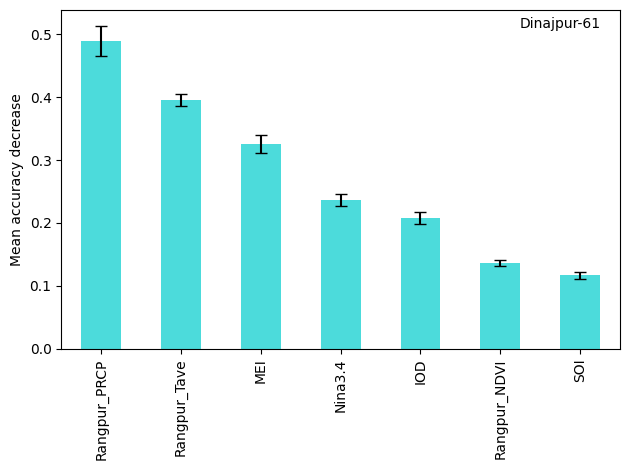

In [63]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

def calculate_permutation_importance(model, X, y, n_repeats=10, random_state=42, n_jobs=2):
    result = permutation_importance(model, X, y, n_repeats=n_repeats, random_state=random_state, n_jobs=n_jobs)
    feature_importances = pd.Series(result.importances_mean, index=X.columns)
    feature_std= pd.Series(result.importances_std, index=X.columns)
    return feature_importances, feature_std

# Define the hybrid model weights
weight_rf = 0.3
weight_lgb = 0.3
weight_catboost = 0.3
weight_BRR = 0.1

# Calculate permutation feature importances for Random Forest
rf_feature_importance, rf_feature_std = calculate_permutation_importance(best_rf, X_test, y_test)

# Calculate permutation feature importances for LightGBM
lgb_feature_importance, lgb_feature_std = calculate_permutation_importance(best_lgb, X_test, y_test)

# Calculate permutation feature importances for CatBoost
catboost_feature_importance, catboost_feature_std = calculate_permutation_importance(best_catboost, X_test, y_test)

# Calculate permutation feature importances for Bayesian Ridge
bayesian_ridge_feature_importance, bayesian_ridge_feature_std = calculate_permutation_importance(best_bayesian_ridge, X_test, y_test)


# Combine feature importances based on defined weights
hybrid_feature_importance = (weight_rf * rf_feature_importance +
                            weight_lgb * lgb_feature_importance +
                            weight_catboost * catboost_feature_importance +
                            weight_BRR * bayesian_ridge_feature_importance)

# Calculate upper and lower bounds
hybrid_feature_std = (weight_rf * rf_feature_std +
                      weight_lgb * lgb_feature_std +
                      weight_catboost * catboost_feature_std +
                      weight_BRR * bayesian_ridge_feature_std)

# Sort feature importances in ascending order
hybrid_feature_importance = hybrid_feature_importance.sort_values(ascending=False)

# The feature names and their importances
hybrid_feature_df = pd.DataFrame({
    'Feature': hybrid_feature_importance.index,
    'Importance': hybrid_feature_importance.values
})

# Display the DataFrame
print(hybrid_feature_df)

# Plot feature importances with error bars
fig, ax = plt.subplots()
hybrid_feature_importance.plot.bar(yerr=hybrid_feature_std, ax=ax, color='#00cccc', alpha=0.7, capsize=4)

upper_bound = hybrid_feature_importance + hybrid_feature_std[hybrid_feature_importance.index]
lower_bound = hybrid_feature_importance - hybrid_feature_std[hybrid_feature_importance.index]

# Adding markers for upper and lower bounds
plt.scatter(hybrid_feature_importance.index, upper_bound, color='red', alpha=0)
plt.scatter(hybrid_feature_importance.index, lower_bound, color='green', alpha=0)
plt.text(0.82, 0.98,"Dinajpur-61", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

# 5. Visualization

## Scatter plot: Training Stage: Actual vs. Predicted GWL(m)

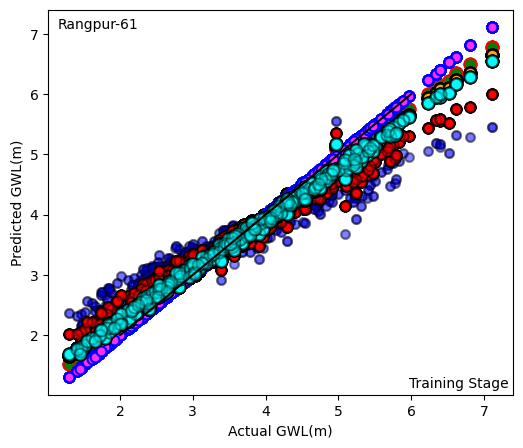

In [64]:
plt.figure(figsize=(6, 5))

plt.scatter(y_train, hybrid1_pred_train, color='blue', edgecolors='black', s=40, linewidths=1.5, alpha=0.04, label='Hybrid Model 1')
plt.scatter(y_train, hybrid2_pred_train, color='green', edgecolors='red', s=70, linewidths=1.5, alpha=0.3, label='Hybrid Model 2')
plt.scatter(y_train, hybrid3_pred_train, color='red', edgecolors='black', s=50, linewidths=1.5,alpha=0.4, label='Hybrid Model 3')
plt.scatter(y_train, hybrid4_pred_train, color='orange', edgecolors='black', s=70, linewidths=1.5, label='Hybrid Model 4')
plt.scatter(y_train,  hybrid5_pred_train, color='#FE2EF7', edgecolors='blue', s=50, linewidths=1.5, label='Hybrid Model 5')
plt.scatter(y_train, hybrid6_pred_train, color='cyan', edgecolors='black', s=70, linewidths=1.5,alpha=0.3, label='Hybrid Model 6')


plt.text(0.02, 0.98,"Rangpur-61", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.99, 0.01, "Training Stage", transform=plt.gca().transAxes, va='bottom', ha='right', fontsize=10)
plt.plot([2, 6], [2, 6], color='black')
plt.xlabel('Actual GWL(m)')
plt.ylabel('Predicted GWL(m)')
plt.grid(False)
plt.show()

## Scatter plot: Validation Stage: Actual vs. Predicted GWL(m)

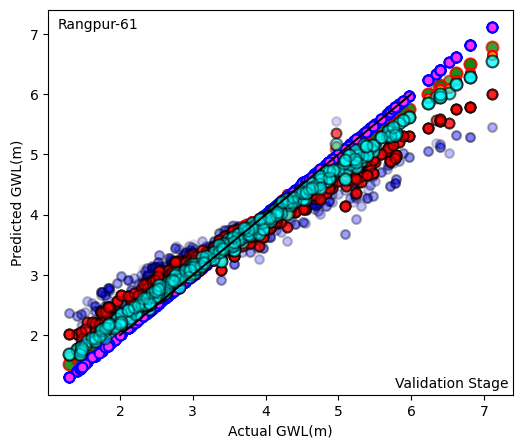

In [65]:
plt.figure(figsize=(6, 5))

plt.scatter(y_val, hybrid1_pred_val, color='blue', edgecolors='black', s=40, linewidths=1.5, alpha=0.09, label='Hybrid Model 1')
plt.scatter(y_val, hybrid2_pred_val, color='green', edgecolors='red', s=70, linewidths=1.5, alpha=0.3,   label='Hybrid Model 2')
plt.scatter(y_val, hybrid3_pred_val, color='red', edgecolors='black', s=50, linewidths=1.5,alpha=0.4, label='Hybrid Model 3')
plt.scatter(y_val, hybrid4_pred_val, color='orange', edgecolors='red', s=40, linewidths=1.5, label='Hybrid Model 4')
plt.scatter(y_val,  hybrid5_pred_val, color='#FE2EF7', edgecolors='blue', s=50, linewidths=1.5, label='Hybrid Model 5')
plt.scatter(y_val, hybrid6_pred_val, color='cyan', edgecolors='black', s=70, linewidths=1.5,alpha=0.3, label='Hybrid Model 6')

plt.text(0.02, 0.98,"Rangpur-61", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.99, 0.01, "Validation Stage", transform=plt.gca().transAxes, va='bottom', ha='right', fontsize=10)
plt.plot([2, 6], [2, 6], color='black')
plt.xlabel('Actual GWL(m)')
plt.ylabel('Predicted GWL(m)')
plt.grid(False)
plt.show()

## Scatter plot: Test Stage: Actual vs. Predicted GWL(m)

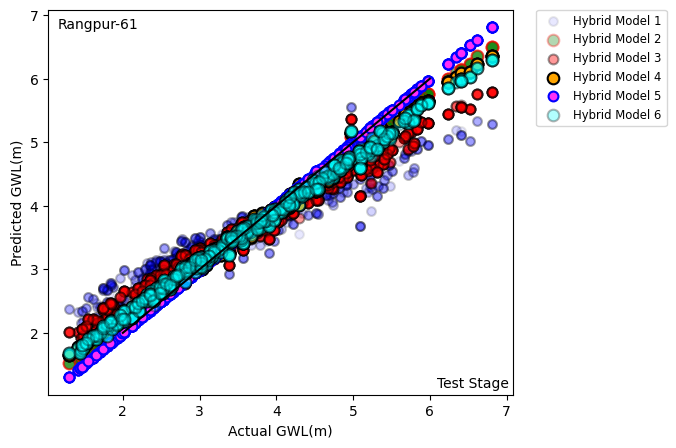

In [66]:
plt.figure(figsize=(6, 5))

plt.scatter(y_test, hybrid1_pred_test, color='blue', edgecolors='black', s=40, linewidths=1.5, alpha=0.09, label='Hybrid Model 1')
plt.scatter(y_test, hybrid2_pred_test,  color='green', edgecolors='red', s=70, linewidths=1.5, alpha=0.3,  label='Hybrid Model 2')
plt.scatter(y_test, hybrid3_pred_test, color='red', edgecolors='black', s=50, linewidths=1.5,alpha=0.4, label='Hybrid Model 3')
plt.scatter(y_test, hybrid4_pred_test, color='orange', edgecolors='black', s=70, linewidths=1.5,  label='Hybrid Model 4')
plt.scatter(y_test,  hybrid5_pred_test,color='#FE2EF7', edgecolors='blue', s=50, linewidths=1.5, label='Hybrid Model 5')
plt.scatter(y_test, hybrid6_pred_test, color='cyan', edgecolors='black', s=70, linewidths=1.5,alpha=0.3, label='Hybrid Model 6')

plt.text(0.02, 0.98,"Rangpur-61", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.99, 0.01, "Test Stage", transform=plt.gca().transAxes, va='bottom', ha='right', fontsize=10)
plt.plot([2, 6], [2, 6], color='black')
plt.xlabel('Actual GWL(m)')
plt.ylabel('Predicted GWL(m)')
plt.grid(False)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0., fontsize='small')
plt.show()

## Training Stage: Comparison of Actual vs. Predicted Groundwater Levels over index using Line Plot for Hybrid Models

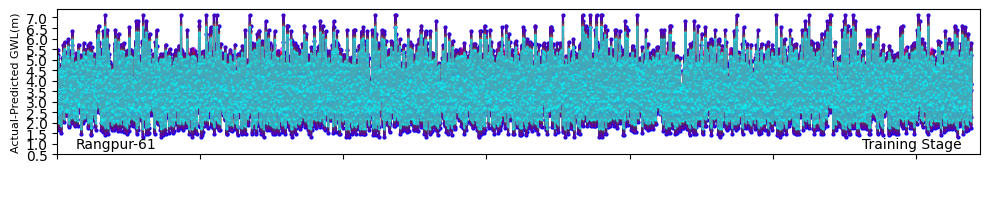

In [67]:
colors = ['#FE2EF7', 'green', 'red', 'orange', 'purple', 'cyan']

models_predictions_train = {
    'Hybrid Model 1': hybrid1_pred_train,
    'Hybrid Model 2': hybrid2_pred_train,
    'Hybrid Model 3': hybrid3_pred_train,
    'Hybrid Model 4': hybrid4_pred_train,
    'Hybrid Model 5': hybrid5_pred_train,
    'Hybrid Model 6': hybrid6_pred_train
}

actual_values = pd.DataFrame({'Actual Values': y_train.values})

plt.figure(figsize=(10, 2.2))

# Plotting the actual values
plt.plot(actual_values.index, actual_values['Actual Values'], label='Actual Values', linestyle='-', marker='o', markersize=2, color='blue')

# Plotting the predicted values for each model
for i, (model_name, predictions) in enumerate(models_predictions_train.items()):
    plt.plot(actual_values.index, predictions, label=model_name, linestyle='-', marker='o', markersize=.5, alpha=0.6, color=colors[i])

max_value = max(actual_values['Actual Values'].max(), np.max(np.array(list(models_predictions_train.values()))))
y_ticks = np.arange(0.5, max_value, step=0.5)
plt.yticks(y_ticks)
plt.xticks(rotation=90, color='white') 
plt.ylabel('Actual-Predicted GWL(m)', fontsize=8)
plt.grid(False)
plt.text(0.02, 0.02,"Rangpur-61", transform=plt.gca().transAxes, va='bottom', ha='left', fontsize=10)
plt.text(0.98, 0.02, "Training Stage", transform=plt.gca().transAxes, va='bottom', ha='right', fontsize=10)
plt.xlim(0, 6450)
plt.tight_layout()
plt.show()

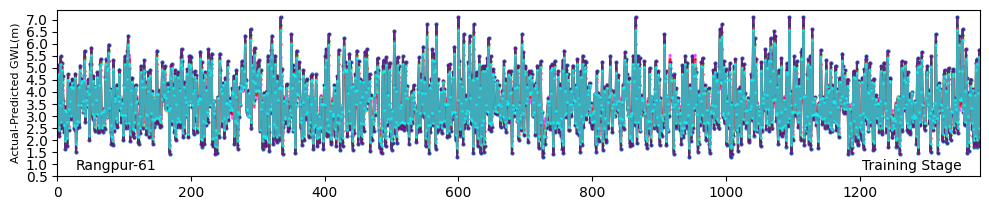

In [68]:
colors = ['#FE2EF7', 'green', 'red', 'orange', 'purple', 'cyan']

models_predictions_train = {
    'Hybrid Model 1': hybrid1_pred_train,
    'Hybrid Model 2': hybrid2_pred_train,
    'Hybrid Model 3': hybrid3_pred_train,
    'Hybrid Model 4': hybrid4_pred_train,
    'Hybrid Model 5': hybrid5_pred_train,
    'Hybrid Model 6': hybrid6_pred_train
}

actual_values = pd.DataFrame({'Actual Values': y_train.values})

plt.figure(figsize=(10, 2.2))

# Plotting the actual values
plt.plot(actual_values.index, actual_values['Actual Values'], label='Actual Values', linestyle='-', marker='o', markersize=2)

# Plotting the predicted values for each model
for i, (model_name, predictions) in enumerate(models_predictions_train.items()):
    plt.plot(actual_values.index, predictions, label=model_name, linestyle='-', marker='o', markersize=1, alpha=0.6, color=colors[i])

max_value = max(actual_values['Actual Values'].max(), np.max(np.array(list(models_predictions_train.values()))))
y_ticks = np.arange(0.5, max_value, step=0.5)
plt.yticks(y_ticks)
plt.ylabel('Actual-Predicted GWL(m)', fontsize=8)
plt.grid(False)
plt.text(0.02, 0.02,"Rangpur-61", transform=plt.gca().transAxes, va='bottom', ha='left', fontsize=10)
plt.text(0.98, 0.02, "Training Stage", transform=plt.gca().transAxes, va='bottom', ha='right', fontsize=10)
plt.tight_layout()
plt.xlim(0, 1380)
plt.show()

## Validation Stage: Comparison of Actual vs. Predicted Groundwater Levels over index using Line Plot for Hybrid Models

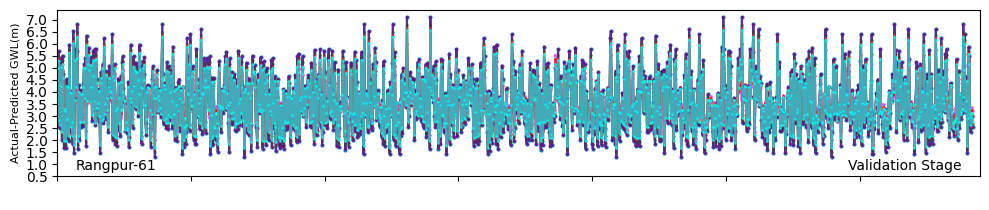

In [69]:
colors = ['#FE2EF7', 'green', 'red', 'orange', 'purple', 'cyan']

models_predictions_val = {
    'Hybrid Model 1': hybrid1_pred_val,
    'Hybrid Model 2': hybrid2_pred_val,
    'Hybrid Model 3': hybrid3_pred_val,
    'Hybrid Model 4': hybrid4_pred_val,
    'Hybrid Model 5': hybrid5_pred_val,
    'Hybrid Model 6': hybrid6_pred_val
}

actual_values = pd.DataFrame({'Actual Values': y_val.values})

plt.figure(figsize=(10, 2.2))

# Plotting the actual values
plt.plot(actual_values.index, actual_values['Actual Values'], label='Actual Values', linestyle='-', marker='o', markersize=2)

# Plotting the predicted values for each model
for i, (model_name, predictions) in enumerate(models_predictions_val.items()):
    plt.plot(actual_values.index, predictions, label=model_name, linestyle='-', marker='o', markersize=1, alpha=0.6, color=colors[i])

max_value = max(actual_values['Actual Values'].max(), np.max(np.array(list(models_predictions_val.values()))))
y_ticks = np.arange(0.5, max_value, step=0.5)
plt.yticks(y_ticks)

plt.ylabel('Actual-Predicted GWL(m)', fontsize=8)
plt.grid(False)
plt.xticks(color='white') 
plt.text(0.02, 0.02,"Rangpur-61", transform=plt.gca().transAxes, va='bottom', ha='left', fontsize=10)
plt.text(0.98, 0.02, "Validation Stage", transform=plt.gca().transAxes, va='bottom', ha='right', fontsize=10)
plt.tight_layout()
plt.xlim(0, 1380)
plt.show()

## Test Stage: Comparison of Actual vs. Predicted Groundwater Levels over index using Line Plot for Hybrid Models

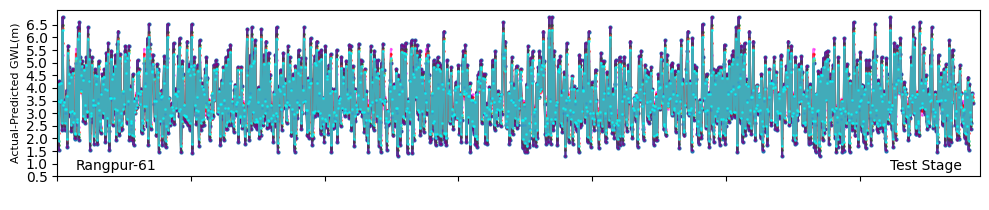

In [70]:
colors = ['#FE2EF7', 'green', 'red', 'orange', 'purple', 'cyan']

models_predictions_test = {
    'Hybrid Model 1': hybrid1_pred_test,
    'Hybrid Model 2': hybrid2_pred_test,
    'Hybrid Model 3': hybrid3_pred_test,
    'Hybrid Model 4': hybrid4_pred_test,
    'Hybrid Model 5': hybrid5_pred_test,
    'Hybrid Model 6': hybrid6_pred_test
}

actual_test = pd.DataFrame({'Actual test': y_test.values})

plt.figure(figsize=(10, 2.2))

# Plotting the actual test
plt.plot(actual_test.index, actual_test['Actual test'], label='Actual test', linestyle='-', marker='o', markersize=2)

# Plotting the predicted test for each model
for i, (model_name, predictions) in enumerate(models_predictions_test.items()):
    plt.plot(actual_test.index, predictions, label=model_name, linestyle='-', marker='o', markersize=1, alpha=0.6, color=colors[i])

max_testue = max(actual_test['Actual test'].max(), np.max(np.array(list(models_predictions_test.values()))))
y_ticks = np.arange(0.5, max_testue, step=0.5)
plt.yticks(y_ticks)
plt.ylabel('Actual-Predicted GWL(m)', fontsize=8)
plt.xticks(color='white') 
plt.grid(False)
plt.text(0.02, 0.02,"Rangpur-61", transform=plt.gca().transAxes, va='bottom', ha='left', fontsize=10)
plt.text(0.98, 0.02, "Test Stage", transform=plt.gca().transAxes, va='bottom', ha='right', fontsize=10)
plt.tight_layout()
plt.xlim(0, 1380)
plt.show()

# Distribution plot and Time series analysis
## Training stage

In [71]:
dates_train = df.loc[y_train.index, 'Date']

hybrid_train_data = {'Actual Values': y_train.values,
                    'Hybrid Model 1': hybrid1_pred_train,
                    'Hybrid Model 2': hybrid2_pred_train,
                    'Hybrid Model 3': hybrid3_pred_train,
                    'Hybrid Model 4': hybrid4_pred_train,
                    'Hybrid Model 5': hybrid5_pred_train,
                    'Hybrid Model 6': hybrid6_pred_train,
                    'Date': dates_train}

hybrid_train_df = pd.DataFrame(hybrid_train_data)

print("\nTraining Set:")
hybrid_train_df


Training Set:


,Actual Values,Hybrid Model 1,Hybrid Model 2,Hybrid Model 3,Hybrid Model 4,Hybrid Model 5,Hybrid Model 6,Date
3063,4.870000,4.220021,4.739497,4.436579,4.619348,4.872438,4.615423,2001-05-22
1940,5.102500,4.168318,4.915723,4.479850,4.758858,5.101874,4.747831,1998-04-25
6848,2.286000,2.997804,2.427521,2.760486,2.515595,2.290495,2.542994,2011-10-02
3509,2.165000,2.837703,2.299727,2.613596,2.394615,2.160497,2.413877,2002-08-11
1612,3.536000,3.329205,3.495049,3.398053,3.460497,3.535859,3.456906,1997-06-01
...,...,...,...,...,...,...,...,...
5734,2.252500,2.862274,2.373127,2.658931,2.501173,2.252036,2.496010,2008-09-13
5191,3.815000,3.851379,3.825242,3.839149,3.893270,3.812056,3.858310,2007-03-20
5390,1.742500,2.673319,1.929213,2.363019,2.047648,1.742928,2.078538,2007-10-05
860,5.790000,4.598100,5.549120,4.995530,5.391951,5.788480,5.357077,1995-05-11


In [72]:
hybrid_train_df['Date'] = pd.to_datetime(hybrid_train_df['Date'], format='%d.%m.%Y')

# Sorting the DataFrame by 'Date'
hybrid_train_df = hybrid_train_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_train_df = hybrid_train_df.reset_index(drop=True)

# the sorted DataFrame
hybrid_train_df

,Actual Values,Hybrid Model 1,Hybrid Model 2,Hybrid Model 3,Hybrid Model 4,Hybrid Model 5,Hybrid Model 6,Date
0,2.488000,3.020376,2.594416,2.842830,2.705340,2.488579,2.701061,1993-01-02
1,2.488000,3.020376,2.594416,2.842830,2.705340,2.488579,2.701061,1993-01-03
2,2.488000,3.020376,2.594416,2.842830,2.705340,2.488579,2.701061,1993-01-05
3,2.488000,3.020376,2.594416,2.842830,2.705340,2.488579,2.701061,1993-01-06
4,2.488000,3.020376,2.594416,2.842830,2.705340,2.488579,2.701061,1993-01-07
...,...,...,...,...,...,...,...,...
6386,4.506667,4.201566,4.444339,4.303403,4.327937,4.528009,4.359500,2017-12-24
6387,4.506667,4.201566,4.444339,4.303403,4.327937,4.528009,4.359500,2017-12-26
6388,4.506667,4.201566,4.444339,4.303403,4.327937,4.528009,4.359500,2017-12-27
6389,4.506667,4.201566,4.444339,4.303403,4.327937,4.528009,4.359500,2017-12-29


## Violin Plot: Distribution of predicted vs actual values groundwater level

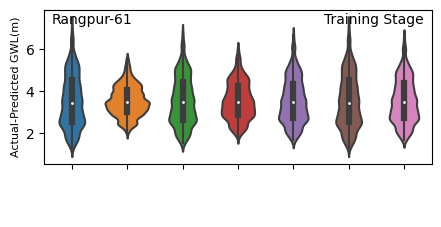

In [73]:
predictions_df = pd.DataFrame({
    'Actual': y_train.values,
    'HM 1': hybrid1_pred_train,
    'HM 2': hybrid2_pred_train,
    'HM 3': hybrid3_pred_train,
    'HM 4': hybrid4_pred_train,
    'HM 5': hybrid5_pred_train,
    'HM 6': hybrid6_pred_train
})

plt.figure(figsize=(5, 2))
ax = sns.violinplot(data=predictions_df)
plt.text(0.02, 0.98,"Rangpur-61", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.98, 0.98, "Training Stage", transform=plt.gca().transAxes, va='top', ha='right', fontsize=10)
plt.xticks(color='white') 
plt.ylabel('Actual-Predicted GWL(m)', fontsize=8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [74]:
hybrid_train_df.T

,0,1,2,3,4,5,6,7,8,9,...,6381,6382,6383,6384,6385,6386,6387,6388,6389,6390
Actual Values,2.488,2.488,2.488,2.488,2.488,2.488,2.488,2.488,2.488,2.488,...,4.506667,4.506667,4.506667,4.506667,4.506667,4.506667,4.506667,4.506667,4.506667,4.506667
Hybrid Model 1,3.020376,3.020376,3.020376,3.020376,3.020376,3.020376,3.020376,3.020376,3.020376,3.020376,...,4.201566,4.201566,4.201566,4.201566,4.201566,4.201566,4.201566,4.201566,4.201566,4.201566
Hybrid Model 2,2.594416,2.594416,2.594416,2.594416,2.594416,2.594416,2.594416,2.594416,2.594416,2.594416,...,4.444339,4.444339,4.444339,4.444339,4.444339,4.444339,4.444339,4.444339,4.444339,4.444339
Hybrid Model 3,2.84283,2.84283,2.84283,2.84283,2.84283,2.84283,2.84283,2.84283,2.84283,2.84283,...,4.303403,4.303403,4.303403,4.303403,4.303403,4.303403,4.303403,4.303403,4.303403,4.303403
Hybrid Model 4,2.70534,2.70534,2.70534,2.70534,2.70534,2.70534,2.70534,2.70534,2.70534,2.70534,...,4.327937,4.327937,4.327937,4.327937,4.327937,4.327937,4.327937,4.327937,4.327937,4.327937
Hybrid Model 5,2.488579,2.488579,2.488579,2.488579,2.488579,2.488579,2.488579,2.488579,2.488579,2.488579,...,4.528009,4.528009,4.528009,4.528009,4.528009,4.528009,4.528009,4.528009,4.528009,4.528009
Hybrid Model 6,2.701061,2.701061,2.701061,2.701061,2.701061,2.701061,2.701061,2.701061,2.701061,2.701061,...,4.3595,4.3595,4.3595,4.3595,4.3595,4.3595,4.3595,4.3595,4.3595,4.3595
Date,1993-01-02 00:00:00,1993-01-03 00:00:00,1993-01-05 00:00:00,1993-01-06 00:00:00,1993-01-07 00:00:00,1993-01-08 00:00:00,1993-01-10 00:00:00,1993-01-11 00:00:00,1993-01-12 00:00:00,1993-01-14 00:00:00,...,2017-12-16 00:00:00,2017-12-18 00:00:00,2017-12-19 00:00:00,2017-12-20 00:00:00,2017-12-22 00:00:00,2017-12-24 00:00:00,2017-12-26 00:00:00,2017-12-27 00:00:00,2017-12-29 00:00:00,2017-12-31 00:00:00


# Time series plots: predicted vs actual values groundwater level

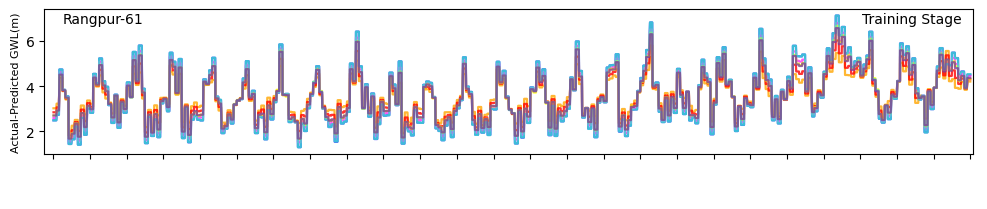

In [75]:
# Converting the 'Date' column to datetime format
hybrid_train_df['Date'] = pd.to_datetime(hybrid_train_df['Date'], format='%d.%m.%Y')

# Sorting the DataFrame by 'Date'
hybrid_train_df = hybrid_train_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_train_df = hybrid_train_df.reset_index(drop=True)

# Creating a time series plot
plt.figure(figsize=(10, 2.2))

# Define a list of colors (you can change these to your preferred colors)
colors = ['blue', 'orange','#FE2EF7', 'red', 'yellow', '#40E0D0', '#7D3C98', 'purple']

# Iterating over the hybrid models and plot their predictions with different colors
for i, col in enumerate(hybrid_train_df.columns[:-1]):
    plt.plot(hybrid_train_df['Date'], hybrid_train_df[col], label=col, color=colors[i], alpha=0.8, linewidth=1.6)


plt.ylabel('Actual-Predicted GWL(m)', fontsize=8)
plt.xticks(rotation=90, color='black') 
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xlim(pd.Timestamp('1992-10-01'), pd.Timestamp('2018-01-31'))
plt.text(0.02, 0.98, "Rangpur-61", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.88, 0.98, "Training Stage", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.tight_layout()
plt.xticks(color='white') 
plt.show()

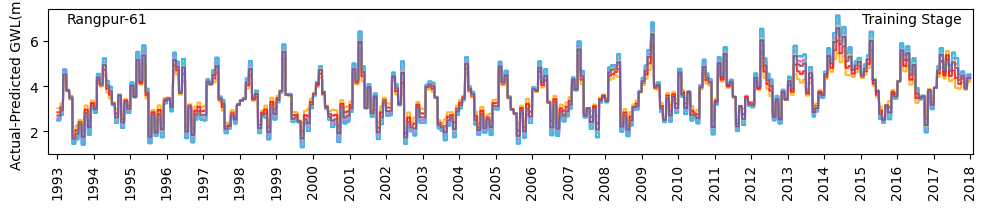

In [76]:
# Converting the 'Date' column to datetime format
hybrid_train_df['Date'] = pd.to_datetime(hybrid_train_df['Date'], format='%d.%m.%Y')

# Sorting the DataFrame by 'Date'
hybrid_train_df = hybrid_train_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_train_df = hybrid_train_df.reset_index(drop=True)

# Creating a time series plot
plt.figure(figsize=(10, 2.2))

# Define a list of colors (you can change these to your preferred colors)
colors = ['blue', 'orange','#FE2EF7', 'red', 'yellow', '#40E0D0', '#7D3C98', 'purple']

# Iterating over the hybrid models and plot their predictions with different colors
for i, col in enumerate(hybrid_train_df.columns[:-1]):
    plt.plot(hybrid_train_df['Date'], hybrid_train_df[col], label=col, color=colors[i], alpha=0.8, linewidth=1.5)

plt.ylabel('Actual-Predicted GWL(m)')
plt.xticks(rotation=90) 
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xlim(pd.Timestamp('1992-10-01'), pd.Timestamp('2018-01-31'))
plt.text(0.02, 0.98, "Rangpur-61", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.88, 0.98, "Training Stage", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.tight_layout()
plt.show()

# Distribution plot and Time series analysis
## Validation stage

In [77]:
dates_val = df.loc[y_val.index, 'Date']

hybrid_val_data = {'Actual Values': y_val.values,
                    'Hybrid Model 1': hybrid1_pred_val,
                    'Hybrid Model 2': hybrid2_pred_val,
                    'Hybrid Model 3': hybrid3_pred_val,
                    'Hybrid Model 4': hybrid4_pred_val,
                    'Hybrid Model 5': hybrid5_pred_val,
                    'Hybrid Model 6': hybrid6_pred_val,
                    'Date': dates_val}

hybrid_val_df = pd.DataFrame(hybrid_val_data)

print("\nValidation Set:")
hybrid_val_df


Validation Set:


,Actual Values,Hybrid Model 1,Hybrid Model 2,Hybrid Model 3,Hybrid Model 4,Hybrid Model 5,Hybrid Model 6,Date
7609,3.626,3.819357,3.663258,3.755166,3.642036,3.626292,3.677632,2013-11-01
4084,5.270,4.531801,5.122529,4.777927,4.995066,5.271920,4.986504,2004-03-08
7920,5.710,4.479206,5.465049,4.889465,5.386326,5.710623,5.303740,2014-09-08
8327,2.540,3.338592,2.700427,3.072269,2.798301,2.538334,2.827530,2015-10-20
2716,2.520,2.888946,2.593934,2.765987,2.601300,2.519497,2.635155,2000-06-09
...,...,...,...,...,...,...,...,...
5762,2.964,3.191439,3.014005,3.115532,3.130467,2.965805,3.083647,2008-10-11
3254,2.320,3.102735,2.477118,2.841692,2.594050,2.317941,2.611762,2001-11-29
4541,2.945,2.991700,2.954133,2.976106,2.953547,2.945242,2.963186,2005-06-08
350,3.018,3.363438,3.085641,3.248420,3.105402,3.019111,3.132821,1993-12-17


In [78]:
hybrid_val_df['Date'] = pd.to_datetime(hybrid_val_df['Date'], format='%d.%m.%Y')

# Sorting the DataFrame by 'Date'
hybrid_val_df = hybrid_val_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_val_df = hybrid_val_df.reset_index(drop=True)

# the sorted DataFrame
hybrid_val_df

,Actual Values,Hybrid Model 1,Hybrid Model 2,Hybrid Model 3,Hybrid Model 4,Hybrid Model 5,Hybrid Model 6,Date
0,2.488000,3.020376,2.594416,2.842830,2.705340,2.487913,2.701061,1993-01-09
1,2.488000,3.020376,2.594416,2.842830,2.705340,2.487913,2.701061,1993-01-15
2,2.488000,3.020376,2.594416,2.842830,2.705340,2.487913,2.701061,1993-01-18
3,2.488000,3.020376,2.594416,2.842830,2.705340,2.487913,2.701061,1993-01-20
4,2.488000,3.020376,2.594416,2.842830,2.705340,2.487913,2.701061,1993-01-24
...,...,...,...,...,...,...,...,...
1365,3.964000,3.836623,3.942370,3.879181,3.894205,3.966100,3.900843,2017-11-10
1366,4.506667,4.201566,4.444339,4.303403,4.327937,4.529229,4.359500,2017-12-17
1367,4.506667,4.201566,4.444339,4.303403,4.327937,4.529229,4.359500,2017-12-21
1368,4.506667,4.201566,4.444339,4.303403,4.327937,4.529229,4.359500,2017-12-23


## Violin Plot: Distribution of predicted vs actual values groundwater level

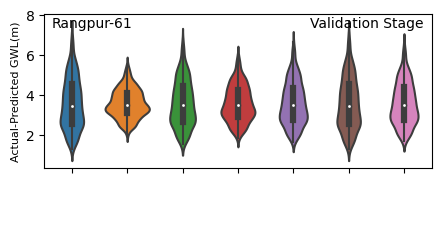

In [79]:
predictions_df = pd.DataFrame({
    'Actual': y_val.values,
    'HM 1': hybrid1_pred_val,
    'HM 2': hybrid2_pred_val,
    'HM 3': hybrid3_pred_val,
    'HM 4': hybrid4_pred_val,
    'HM 5': hybrid5_pred_val,
    'HM 6': hybrid6_pred_val
})

plt.figure(figsize=(5, 2))
ax = sns.violinplot(data=predictions_df)
plt.text(0.02, 0.98,"Rangpur-61", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.98, 0.98, "Validation Stage", transform=plt.gca().transAxes, va='top', ha='right', fontsize=10)
plt.xticks(color='white') 
plt.ylabel('Actual-Predicted GWL(m)', fontsize=8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [80]:
hybrid_val_df.T

,0,1,2,3,4,5,6,7,8,9,...,1360,1361,1362,1363,1364,1365,1366,1367,1368,1369
Actual Values,2.488,2.488,2.488,2.488,2.488,2.733333,2.733333,2.733333,2.733333,2.733333,...,4.644,4.644,4.644,3.964,3.964,3.964,4.506667,4.506667,4.506667,4.506667
Hybrid Model 1,3.020376,3.020376,3.020376,3.020376,3.020376,3.224904,3.224904,3.224904,3.224904,3.224904,...,4.177459,4.177459,4.177459,3.836623,3.836623,3.836623,4.201566,4.201566,4.201566,4.201566
Hybrid Model 2,2.594416,2.594416,2.594416,2.594416,2.594416,2.83174,2.83174,2.83174,2.83174,2.83174,...,4.549877,4.549877,4.549877,3.94237,3.94237,3.94237,4.444339,4.444339,4.444339,4.444339
Hybrid Model 3,2.84283,2.84283,2.84283,2.84283,2.84283,3.060991,3.060991,3.060991,3.060991,3.060991,...,4.333064,4.333064,4.333064,3.879181,3.879181,3.879181,4.303403,4.303403,4.303403,4.303403
Hybrid Model 4,2.70534,2.70534,2.70534,2.70534,2.70534,2.911245,2.911245,2.911245,2.911245,2.911245,...,4.432543,4.432543,4.432543,3.894205,3.894205,3.894205,4.327937,4.327937,4.327937,4.327937
Hybrid Model 5,2.487913,2.487913,2.487913,2.487913,2.487913,2.740168,2.740168,2.740168,2.740168,2.740168,...,4.633837,4.633837,4.633837,3.9661,3.9661,3.9661,4.529229,4.529229,4.529229,4.529229
Hybrid Model 6,2.701061,2.701061,2.701061,2.701061,2.701061,2.91984,2.91984,2.91984,2.91984,2.91984,...,4.447997,4.447997,4.447997,3.900843,3.900843,3.900843,4.3595,4.3595,4.3595,4.3595
Date,1993-01-09 00:00:00,1993-01-15 00:00:00,1993-01-18 00:00:00,1993-01-20 00:00:00,1993-01-24 00:00:00,1993-02-07 00:00:00,1993-02-11 00:00:00,1993-02-18 00:00:00,1993-02-20 00:00:00,1993-02-26 00:00:00,...,2017-10-13 00:00:00,2017-10-14 00:00:00,2017-10-25 00:00:00,2017-11-01 00:00:00,2017-11-02 00:00:00,2017-11-10 00:00:00,2017-12-17 00:00:00,2017-12-21 00:00:00,2017-12-23 00:00:00,2017-12-25 00:00:00


# Time series plots: predicted vs actual values groundwater level

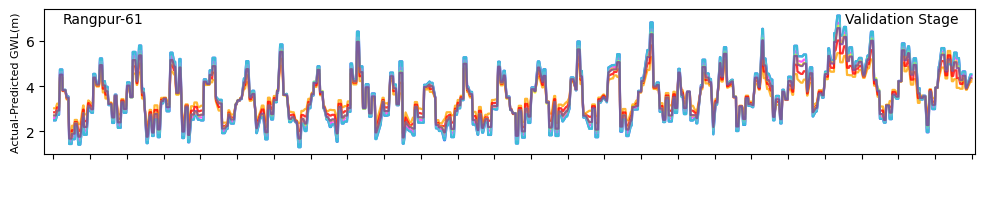

In [81]:
# Converting the 'Date' column to datetime format
hybrid_val_df['Date'] = pd.to_datetime(hybrid_val_df['Date'], format='%d.%m.%Y')

# Sorting the DataFrame by 'Date'
hybrid_val_df = hybrid_val_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_val_df = hybrid_val_df.reset_index(drop=True)

# Creating a time series plot
plt.figure(figsize=(10, 2.2))

# Define a list of colors (you can change these to your preferred colors)
colors = ['blue', 'orange','#FE2EF7', 'red', 'yellow', '#40E0D0', '#7D3C98', 'purple']

# Iterating over the hybrid models and plot their predictions with different colors
for i, col in enumerate(hybrid_val_df.columns[:-1]):
    plt.plot(hybrid_val_df['Date'], hybrid_val_df[col], label=col, color=colors[i], alpha=0.8, linewidth=1.6)


plt.xticks(color='white') 
plt.ylabel('Actual-Predicted GWL(m)', fontsize=8)
plt.xticks(rotation=90, color='black') 
plt.xticks(color='white') 
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xlim(pd.Timestamp('1992-10-01'), pd.Timestamp('2018-01-31'))
plt.text(0.02, 0.98, "Rangpur-61", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.86, 0.98, "Validation Stage", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.tight_layout()
plt.show()

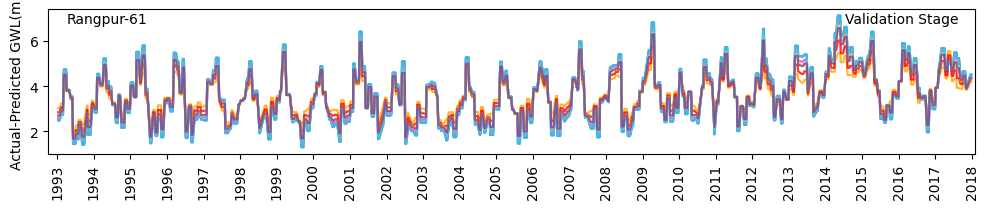

In [82]:
# Converting the 'Date' column to datetime format
hybrid_val_df['Date'] = pd.to_datetime(hybrid_val_df['Date'], format='%d.%m.%Y')

# Sorting the DataFrame by 'Date'
hybrid_val_df = hybrid_val_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_val_df = hybrid_val_df.reset_index(drop=True)

# Creating a time series plot
plt.figure(figsize=(10, 2.2))

# Define a list of colors (you can change these to your preferred colors)
colors = ['blue', 'orange','#FE2EF7', 'red', 'yellow', '#40E0D0', '#7D3C98', 'purple']

# Iterating over the hybrid models and plot their predictions with different colors
for i, col in enumerate(hybrid_val_df.columns[:-1]):
    plt.plot(hybrid_val_df['Date'], hybrid_val_df[col], label=col, color=colors[i], alpha=0.8, linewidth=1.6)


plt.ylabel('Actual-Predicted GWL(m)')
plt.xticks(rotation=90, color='black') 
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xlim(pd.Timestamp('1992-10-01'), pd.Timestamp('2018-01-31'))
plt.text(0.02, 0.98, "Rangpur-61", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.86, 0.98, "Validation Stage", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.tight_layout()
plt.show()

# Distribution plot and Time series analysis
## Test stage

In [83]:
dates_test = df.loc[y_test.index, 'Date']

hybrid_test_data = {'Actual Values': y_test.values,
                    'Hybrid Model 1': hybrid1_pred_test,
                    'Hybrid Model 2': hybrid2_pred_test,
                    'Hybrid Model 3': hybrid3_pred_test,
                    'Hybrid Model 4': hybrid4_pred_test,
                    'Hybrid Model 5': hybrid5_pred_test,
                    'Hybrid Model 6': hybrid6_pred_test,
                    'Date': dates_test}

hybrid_test_df = pd.DataFrame(hybrid_test_data)

print("\nTest Set:")
hybrid_test_df


Test Set:


,Actual Values,Hybrid Model 1,Hybrid Model 2,Hybrid Model 3,Hybrid Model 4,Hybrid Model 5,Hybrid Model 6,Date
4710,2.760000,3.439013,2.897362,3.212568,2.993190,2.760219,3.005790,2005-11-24
131,3.544000,3.408397,3.515167,3.453672,3.476000,3.540712,3.486300,1993-05-12
2802,1.543333,2.559792,1.750192,2.221056,1.878581,1.550107,1.909853,2000-09-03
4472,4.258000,4.032840,4.211524,4.107991,4.144487,4.260429,4.158645,2005-03-31
1108,3.400000,3.490626,3.418128,3.460386,3.440515,3.400866,3.443094,1996-01-14
...,...,...,...,...,...,...,...,...
2948,2.862000,3.323641,2.954071,3.169850,3.025428,2.861605,3.033295,2001-01-27
6394,2.356667,2.945985,2.475137,2.749476,2.588569,2.355850,2.589545,2010-07-05
1746,2.610000,2.932955,2.675069,2.825356,2.777120,2.610534,2.756773,1997-10-13
5820,3.787500,3.713659,3.774971,3.738263,3.740168,3.790626,3.747702,2008-12-08


In [84]:
# Converting the 'Date' column to datetime format
hybrid_test_df['Date'] = pd.to_datetime(hybrid_test_df['Date'], format='%d.%m.%Y')

# Sorting the DataFrame by 'Date'
hybrid_test_df = hybrid_test_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_test_df = hybrid_test_df.reset_index(drop=True)
hybrid_test_df

,Actual Values,Hybrid Model 1,Hybrid Model 2,Hybrid Model 3,Hybrid Model 4,Hybrid Model 5,Hybrid Model 6,Date
0,2.488000,3.020376,2.594416,2.842830,2.705340,2.488134,2.701061,1993-01-01
1,2.488000,3.020376,2.594416,2.842830,2.705340,2.488134,2.701061,1993-01-04
2,2.488000,3.020376,2.594416,2.842830,2.705340,2.488134,2.701061,1993-01-13
3,2.488000,3.020376,2.594416,2.842830,2.705340,2.488134,2.701061,1993-01-27
4,2.488000,3.020376,2.594416,2.842830,2.705340,2.488134,2.701061,1993-01-31
...,...,...,...,...,...,...,...,...
1365,3.964000,3.836623,3.942370,3.879181,3.894205,3.966829,3.900843,2017-11-30
1366,4.506667,4.201566,4.444339,4.303403,4.327937,4.520615,4.359500,2017-12-07
1367,4.506667,4.201566,4.444339,4.303403,4.327937,4.520615,4.359500,2017-12-10
1368,4.506667,4.201566,4.444339,4.303403,4.327937,4.520615,4.359500,2017-12-28


# Violin Plot: Distribution of Predicted vs Actual Values

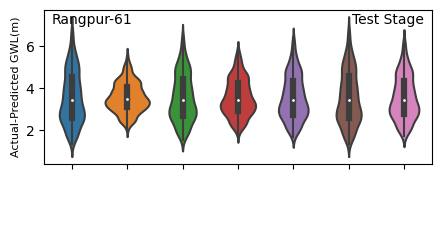

In [85]:
# Combining the predicted values into a single DataFrame
predictions_df = pd.DataFrame({
    'Actual': y_test.values,
    'HM 1': hybrid1_pred_test,
    'HM 2': hybrid2_pred_test,
    'HM 3': hybrid3_pred_test,
    'HM 4': hybrid4_pred_test,
    'HM 5': hybrid5_pred_test,
    'HM 6': hybrid6_pred_test
})

plt.figure(figsize=(5, 2))
ax = sns.violinplot(data=predictions_df)
plt.xticks(color='white') 
plt.ylabel('Actual-Predicted GWL(m)', fontsize=8)
plt.text(0.02, 0.98,"Rangpur-61", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.98, 0.98, "Test Stage", transform=plt.gca().transAxes, va='top', ha='right', fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [86]:
# Converting the 'Date' column to datetime format
hybrid_test_df['Date'] = pd.to_datetime(hybrid_test_df['Date'], format='%d.%m.%Y')

# Sorting the DataFrame by 'Date'
hybrid_test_df = hybrid_test_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_test_df = hybrid_test_df.reset_index(drop=True)

# the sorted DataFrame
hybrid_test_df.T

,0,1,2,3,4,5,6,7,8,9,...,1360,1361,1362,1363,1364,1365,1366,1367,1368,1369
Actual Values,2.488,2.488,2.488,2.488,2.488,2.733333,2.733333,2.733333,2.733333,2.733333,...,3.964,3.964,3.964,3.964,3.964,3.964,4.506667,4.506667,4.506667,4.506667
Hybrid Model 1,3.020376,3.020376,3.020376,3.020376,3.020376,3.224904,3.224904,3.224904,3.224904,3.224904,...,3.836623,3.836623,3.836623,3.836623,3.836623,3.836623,4.201566,4.201566,4.201566,4.201566
Hybrid Model 2,2.594416,2.594416,2.594416,2.594416,2.594416,2.83174,2.83174,2.83174,2.83174,2.83174,...,3.94237,3.94237,3.94237,3.94237,3.94237,3.94237,4.444339,4.444339,4.444339,4.444339
Hybrid Model 3,2.84283,2.84283,2.84283,2.84283,2.84283,3.060991,3.060991,3.060991,3.060991,3.060991,...,3.879181,3.879181,3.879181,3.879181,3.879181,3.879181,4.303403,4.303403,4.303403,4.303403
Hybrid Model 4,2.70534,2.70534,2.70534,2.70534,2.70534,2.911245,2.911245,2.911245,2.911245,2.911245,...,3.894205,3.894205,3.894205,3.894205,3.894205,3.894205,4.327937,4.327937,4.327937,4.327937
Hybrid Model 5,2.488134,2.488134,2.488134,2.488134,2.488134,2.737714,2.737714,2.737714,2.737714,2.737714,...,3.966829,3.966829,3.966829,3.966829,3.966829,3.966829,4.520615,4.520615,4.520615,4.520615
Hybrid Model 6,2.701061,2.701061,2.701061,2.701061,2.701061,2.91984,2.91984,2.91984,2.91984,2.91984,...,3.900843,3.900843,3.900843,3.900843,3.900843,3.900843,4.3595,4.3595,4.3595,4.3595
Date,1993-01-01 00:00:00,1993-01-04 00:00:00,1993-01-13 00:00:00,1993-01-27 00:00:00,1993-01-31 00:00:00,1993-02-01 00:00:00,1993-02-03 00:00:00,1993-02-09 00:00:00,1993-02-17 00:00:00,1993-02-21 00:00:00,...,2017-11-20 00:00:00,2017-11-25 00:00:00,2017-11-26 00:00:00,2017-11-28 00:00:00,2017-11-29 00:00:00,2017-11-30 00:00:00,2017-12-07 00:00:00,2017-12-10 00:00:00,2017-12-28 00:00:00,2017-12-30 00:00:00


# Time series plots: Test stage

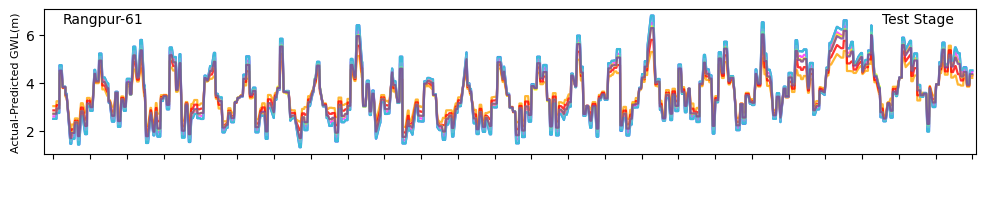

In [87]:
# Converting the 'Date' column to datetime format
hybrid_test_df['Date'] = pd.to_datetime(hybrid_test_df['Date'], format='%d.%m.%Y')

# Sorting the DataFrame by 'Date'
hybrid_test_df = hybrid_test_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_test_df = hybrid_test_df.reset_index(drop=True)

# Creating a time series plot
plt.figure(figsize=(10, 2.2))

# Define a list of colors (you can change these to your preferred colors)
colors = ['blue', 'orange','#FE2EF7', 'red', 'yellow', '#40E0D0', '#7D3C98', 'purple']

# Iterating over the hybrid models and plot their predictions with different colors
for i, col in enumerate(hybrid_test_df.columns[:-1]):
    plt.plot(hybrid_test_df['Date'], hybrid_test_df[col], label=col, color=colors[i], alpha=0.8, linewidth=1.6)


plt.ylabel('Actual-Predicted GWL(m)', fontsize=8)
plt.xticks(rotation=90, color='black') 
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xlim(pd.Timestamp('1992-10-01'), pd.Timestamp('2018-01-31'))
plt.text(0.02, 0.98, "Rangpur-61", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.90, 0.98, "Test Stage", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.xticks(color='white') 
plt.tight_layout()
plt.show()

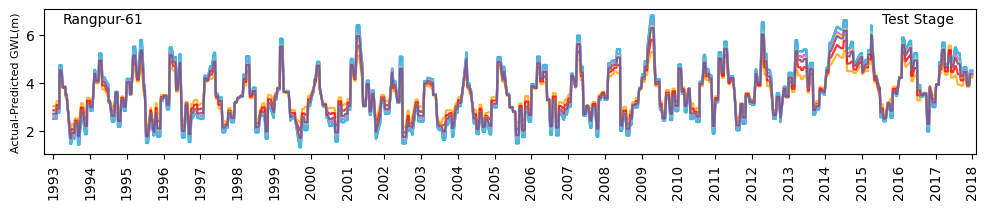

In [88]:
# Converting the 'Date' column to datetime format
hybrid_test_df['Date'] = pd.to_datetime(hybrid_test_df['Date'], format='%d.%m.%Y')

# Sorting the DataFrame by 'Date'
hybrid_test_df = hybrid_test_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_test_df = hybrid_test_df.reset_index(drop=True)

# Creating a time series plot
plt.figure(figsize=(10, 2.2))

# Define a list of colors (you can change these to your preferred colors)
colors = ['blue', 'orange','#FE2EF7', 'red', 'yellow', '#40E0D0', '#7D3C98', 'purple']

# Iterating over the hybrid models and plot their predictions with different colors
for i, col in enumerate(hybrid_test_df.columns[:-1]):
    plt.plot(hybrid_test_df['Date'], hybrid_test_df[col], label=col, color=colors[i], alpha=0.8, linewidth=1.6)

plt.ylabel('Actual-Predicted GWL(m)', fontsize=8)
plt.xticks(rotation=90) 
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xlim(pd.Timestamp('1992-10-01'), pd.Timestamp('2018-01-31'))
plt.text(0.02, 0.98, "Rangpur-61", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.90, 0.98, "Test Stage", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.tight_layout()
plt.show()

# Density Plot: Training stage

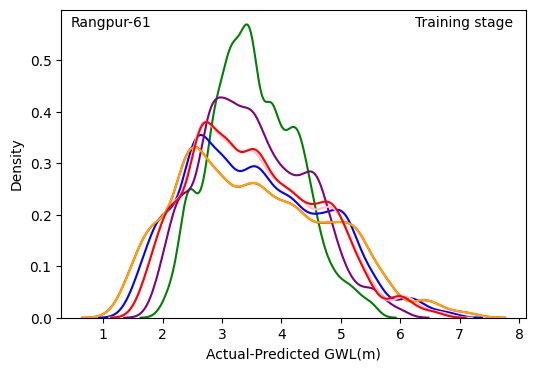

In [89]:
plt.figure(figsize=(6, 4))

# Plotting density plots for each hybrid model
sns.kdeplot(y_train.values, color='red', label='Actual Values')
sns.kdeplot(hybrid1_pred_train, color='green', label='Hybrid Model 1')
sns.kdeplot(hybrid2_pred_train, color='blue', label='Hybrid Model 2')
sns.kdeplot(hybrid3_pred_train, color='purple', label='Hybrid Model 3')
sns.kdeplot(hybrid4_pred_train, color='pink', label='Hybrid Model 4')
sns.kdeplot(hybrid5_pred_train, color='orange', label='Hybrid Model 5')
sns.kdeplot(hybrid6_pred_train, color='red', label='Hybrid Model 6')

# Customize the plot
plt.xlabel('Actual-Predicted GWL(m)')
plt.ylabel('Density')
plt.grid(False)
plt.text(0.02, 0.98,"Rangpur-61", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.76, 0.98, "Training stage", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.show()

# Density Plot: Validation stage

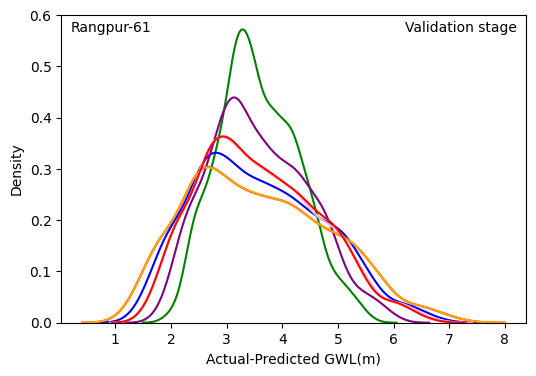

In [90]:
plt.figure(figsize=(6, 4))

# Plotting density plots for each hybrid model
sns.kdeplot(y_val.values, color='red', label='Actual Values')
sns.kdeplot(hybrid1_pred_val, color='green', label='Hybrid Model 1')
sns.kdeplot(hybrid2_pred_val, color='blue', label='Hybrid Model 2')
sns.kdeplot(hybrid3_pred_val, color='purple', label='Hybrid Model 3')
sns.kdeplot(hybrid4_pred_val, color='pink', label='Hybrid Model 4')
sns.kdeplot(hybrid5_pred_val, color='orange', label='Hybrid Model 5')
sns.kdeplot(hybrid6_pred_val, color='red', label='Hybrid Model 6')

# Customize the plot
plt.xlabel('Actual-Predicted GWL(m)')
plt.ylabel('Density')
plt.grid(False)
plt.text(0.02, 0.98,"Rangpur-61", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.74, 0.98, "Validation stage", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.show()

# Density Plot: Test stage

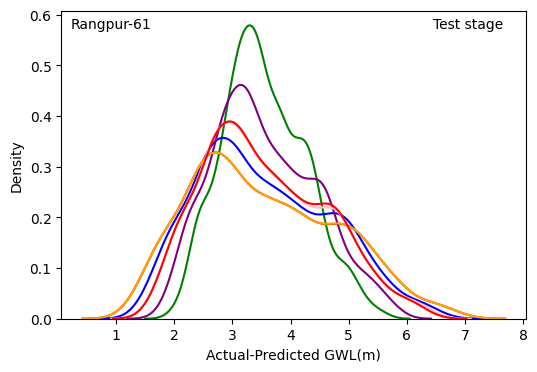

In [91]:
plt.figure(figsize=(6, 4))

# Plotting density plots for each hybrid model
sns.kdeplot(y_test.values, color='red', label='Actual Values')
sns.kdeplot(hybrid1_pred_test, color='green', label='Hybrid Model 1')
sns.kdeplot(hybrid2_pred_test, color='blue', label='Hybrid Model 2')
sns.kdeplot(hybrid3_pred_test, color='purple', label='Hybrid Model 3')
sns.kdeplot(hybrid4_pred_test, color='pink', label='Hybrid Model 4')
sns.kdeplot(hybrid5_pred_test, color='orange', label='Hybrid Model 5')
sns.kdeplot(hybrid6_pred_test, color='red', label='Hybrid Model 6')

# Customize the plot
plt.xlabel('Actual-Predicted GWL(m)')
plt.ylabel('Density')
plt.grid(False)
plt.text(0.02, 0.98,"Rangpur-61", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.80, 0.98, "Test stage", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.show()